In [2]:
import yaml
with open('config.yaml', 'r') as config:
    cfg = yaml.safe_load(config)

In [3]:
# Importing the libraries
import pandas as pd # used for data manipulation
from sklearn.model_selection import train_test_split # used for splitting training and testing data
import numpy as np
from matplotlib import pyplot as plt # used for plotting graphs
import seaborn as sns # used for TODO

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression

In [5]:
import category_encoders as ce
from category_encoders import wrapper
from scipy import stats

In [6]:
df = pd.read_csv(cfg["dataset_maus"])[:10**5]

In [9]:
# Displaying the first 10 rows of the dataset
df.head(n=10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
df_train.info() # Displaying the information of the training dataset

(Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
        'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
        'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
        'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
        'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
        'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
        'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
        'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
        'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
        'Astronomical_Twilight'],
       dtype='object'),
 100000)

In [11]:
df_train.isna().sum().sort_values(ascending=False)

End_Lat                  100000
End_Lng                  100000
Wind_Chill(F)             95678
Precipitation(in)         92632
Wind_Speed(mph)           23820
Humidity(%)                1856
Visibility(mi)             1846
Weather_Condition          1604
Temperature(F)             1591
Pressure(in)               1292
Wind_Direction             1064
Weather_Timestamp          1054
Airport_Code                  7
Zipcode                       7
Timezone                      7
Sunrise_Sunset                1
Civil_Twilight                1
Nautical_Twilight             1
Astronomical_Twilight         1
City                          1
Country                       0
Junction                      0
Severity                      0
Start_Time                    0
End_Time                      0
Turning_Loop                  0
Traffic_Signal                0
Traffic_Calming               0
Stop                          0
Station                       0
Roundabout                    0
Railway 

(0.9999934274298031, 0.9999987660494893)

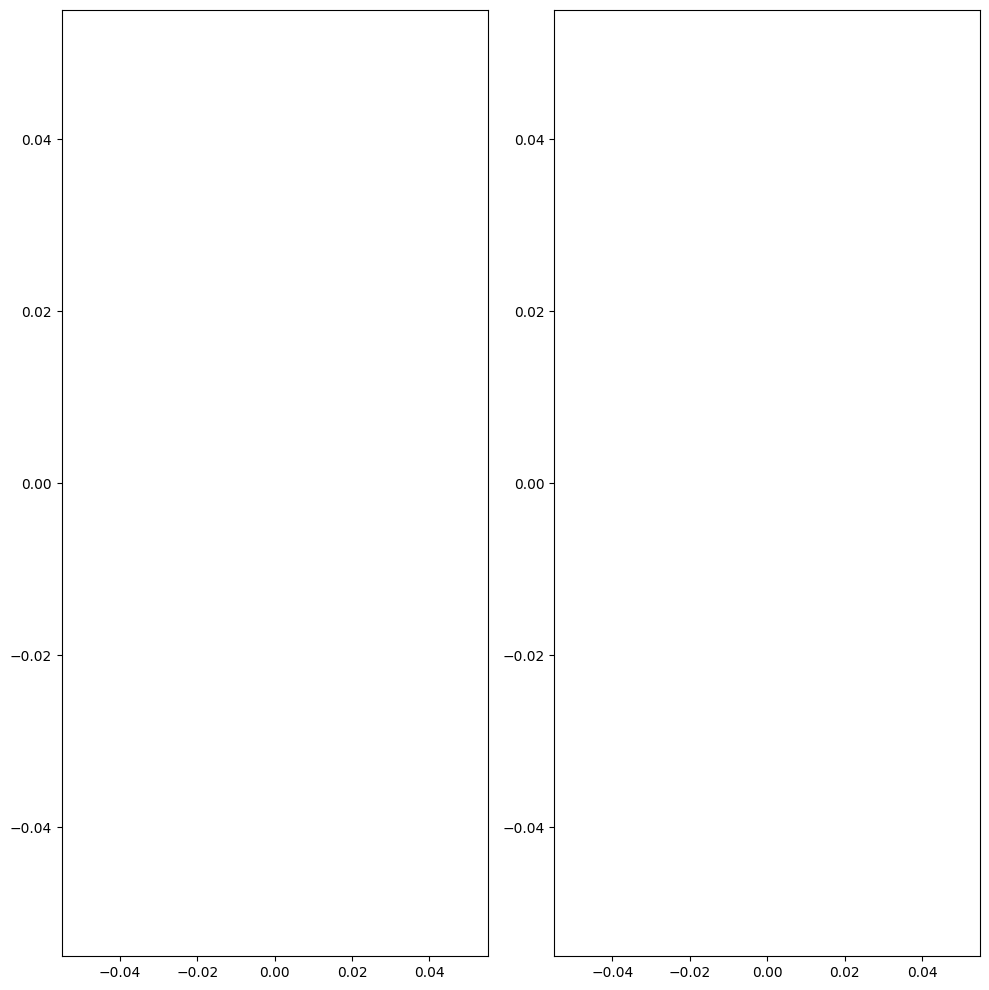

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
df_cor = df_train[['Start_Lat', 'End_Lat', 'Start_Lng', 'End_Lng']]
df_cor.dropna()
axes[0].plot(df_cor['Start_Lat'], df_cor['End_Lat'], 'ro', linestyle="None")
axes[1].plot(df_cor['Start_Lng'], df_cor['End_Lng'], 'bo', linestyle="None")
fig.tight_layout()

df_train['Start_Lat'].corr(df_train['End_Lat']), df_train['Start_Lng'].corr(df_train['End_Lng'])

In [13]:
def add_column_mean_coordinate(start: pd.Series, end: pd.Series) -> pd.Series:
    fill_end = end.fillna(start)
    new_series = (start + fill_end) / 2
    return new_series
 
df_train['Lat'] = add_column_mean_coordinate(df_train['Start_Lat'], df_train['End_Lat'])
df_train['Lng'] = add_column_mean_coordinate(df_train['Start_Lng'], df_train['End_Lng'])

# df_train.drop(columns=['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng'], inplace=True)

In [14]:
nan_df = (df_train.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(10)

,column_name,percentage
7,End_Lat,100.000
8,End_Lng,100.000
21,Wind_Chill(F),95.678
27,Precipitation(in),92.632
26,Wind_Speed(mph),23.820
22,Humidity(%),1.856
24,Visibility(mi),1.846
28,Weather_Condition,1.604
20,Temperature(F),1.591
23,Pressure(in),1.292


In [15]:
df_train.drop(columns=['ID', 'Source', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng'], inplace=True)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               100000 non-null  int64  
 1   Start_Time             100000 non-null  object 
 2   End_Time               100000 non-null  object 
 3   Distance(mi)           100000 non-null  float64
 4   Description            100000 non-null  object 
 5   Street                 100000 non-null  object 
 6   City                   99999 non-null   object 
 7   County                 100000 non-null  object 
 8   State                  100000 non-null  object 
 9   Zipcode                99993 non-null   object 
 10  Country                100000 non-null  object 
 11  Timezone               99993 non-null   object 
 12  Airport_Code           99993 non-null   object 
 13  Weather_Timestamp      98946 non-null   object 
 14  Temperature(F)         98409 non-null

In [17]:
num_df = df_train.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
bool_df = df_train.select_dtypes(exclude=['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'object'])
cat_df = df_train.select_dtypes(include=['object'])
len(num_df.columns), len(bool_df.columns), len(cat_df.columns)

(11, 13, 18)

In [18]:
num_df.columns, bool_df.columns, cat_df.columns

(Index(['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
        'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
        'Precipitation(in)', 'Lat', 'Lng'],
       dtype='object'),
 Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
        'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
        'Traffic_Signal', 'Turning_Loop'],
       dtype='object'),
 Index(['Start_Time', 'End_Time', 'Description', 'Street', 'City', 'County',
        'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
        'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition',
        'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
        'Astronomical_Twilight'],
       dtype='object'))

Заметим, что булевые признаки, кроме Amenity показывают на то, где произошло ДТП:
"Отбойник", "Перекресток", "Уступка", "Развязка", "Запретный выезд", "Железная дорога", "Кольцевая развязка", "Станция", "Остановка", "Регулировка движения", "Дорожный сигнал", "Поворотная петля"


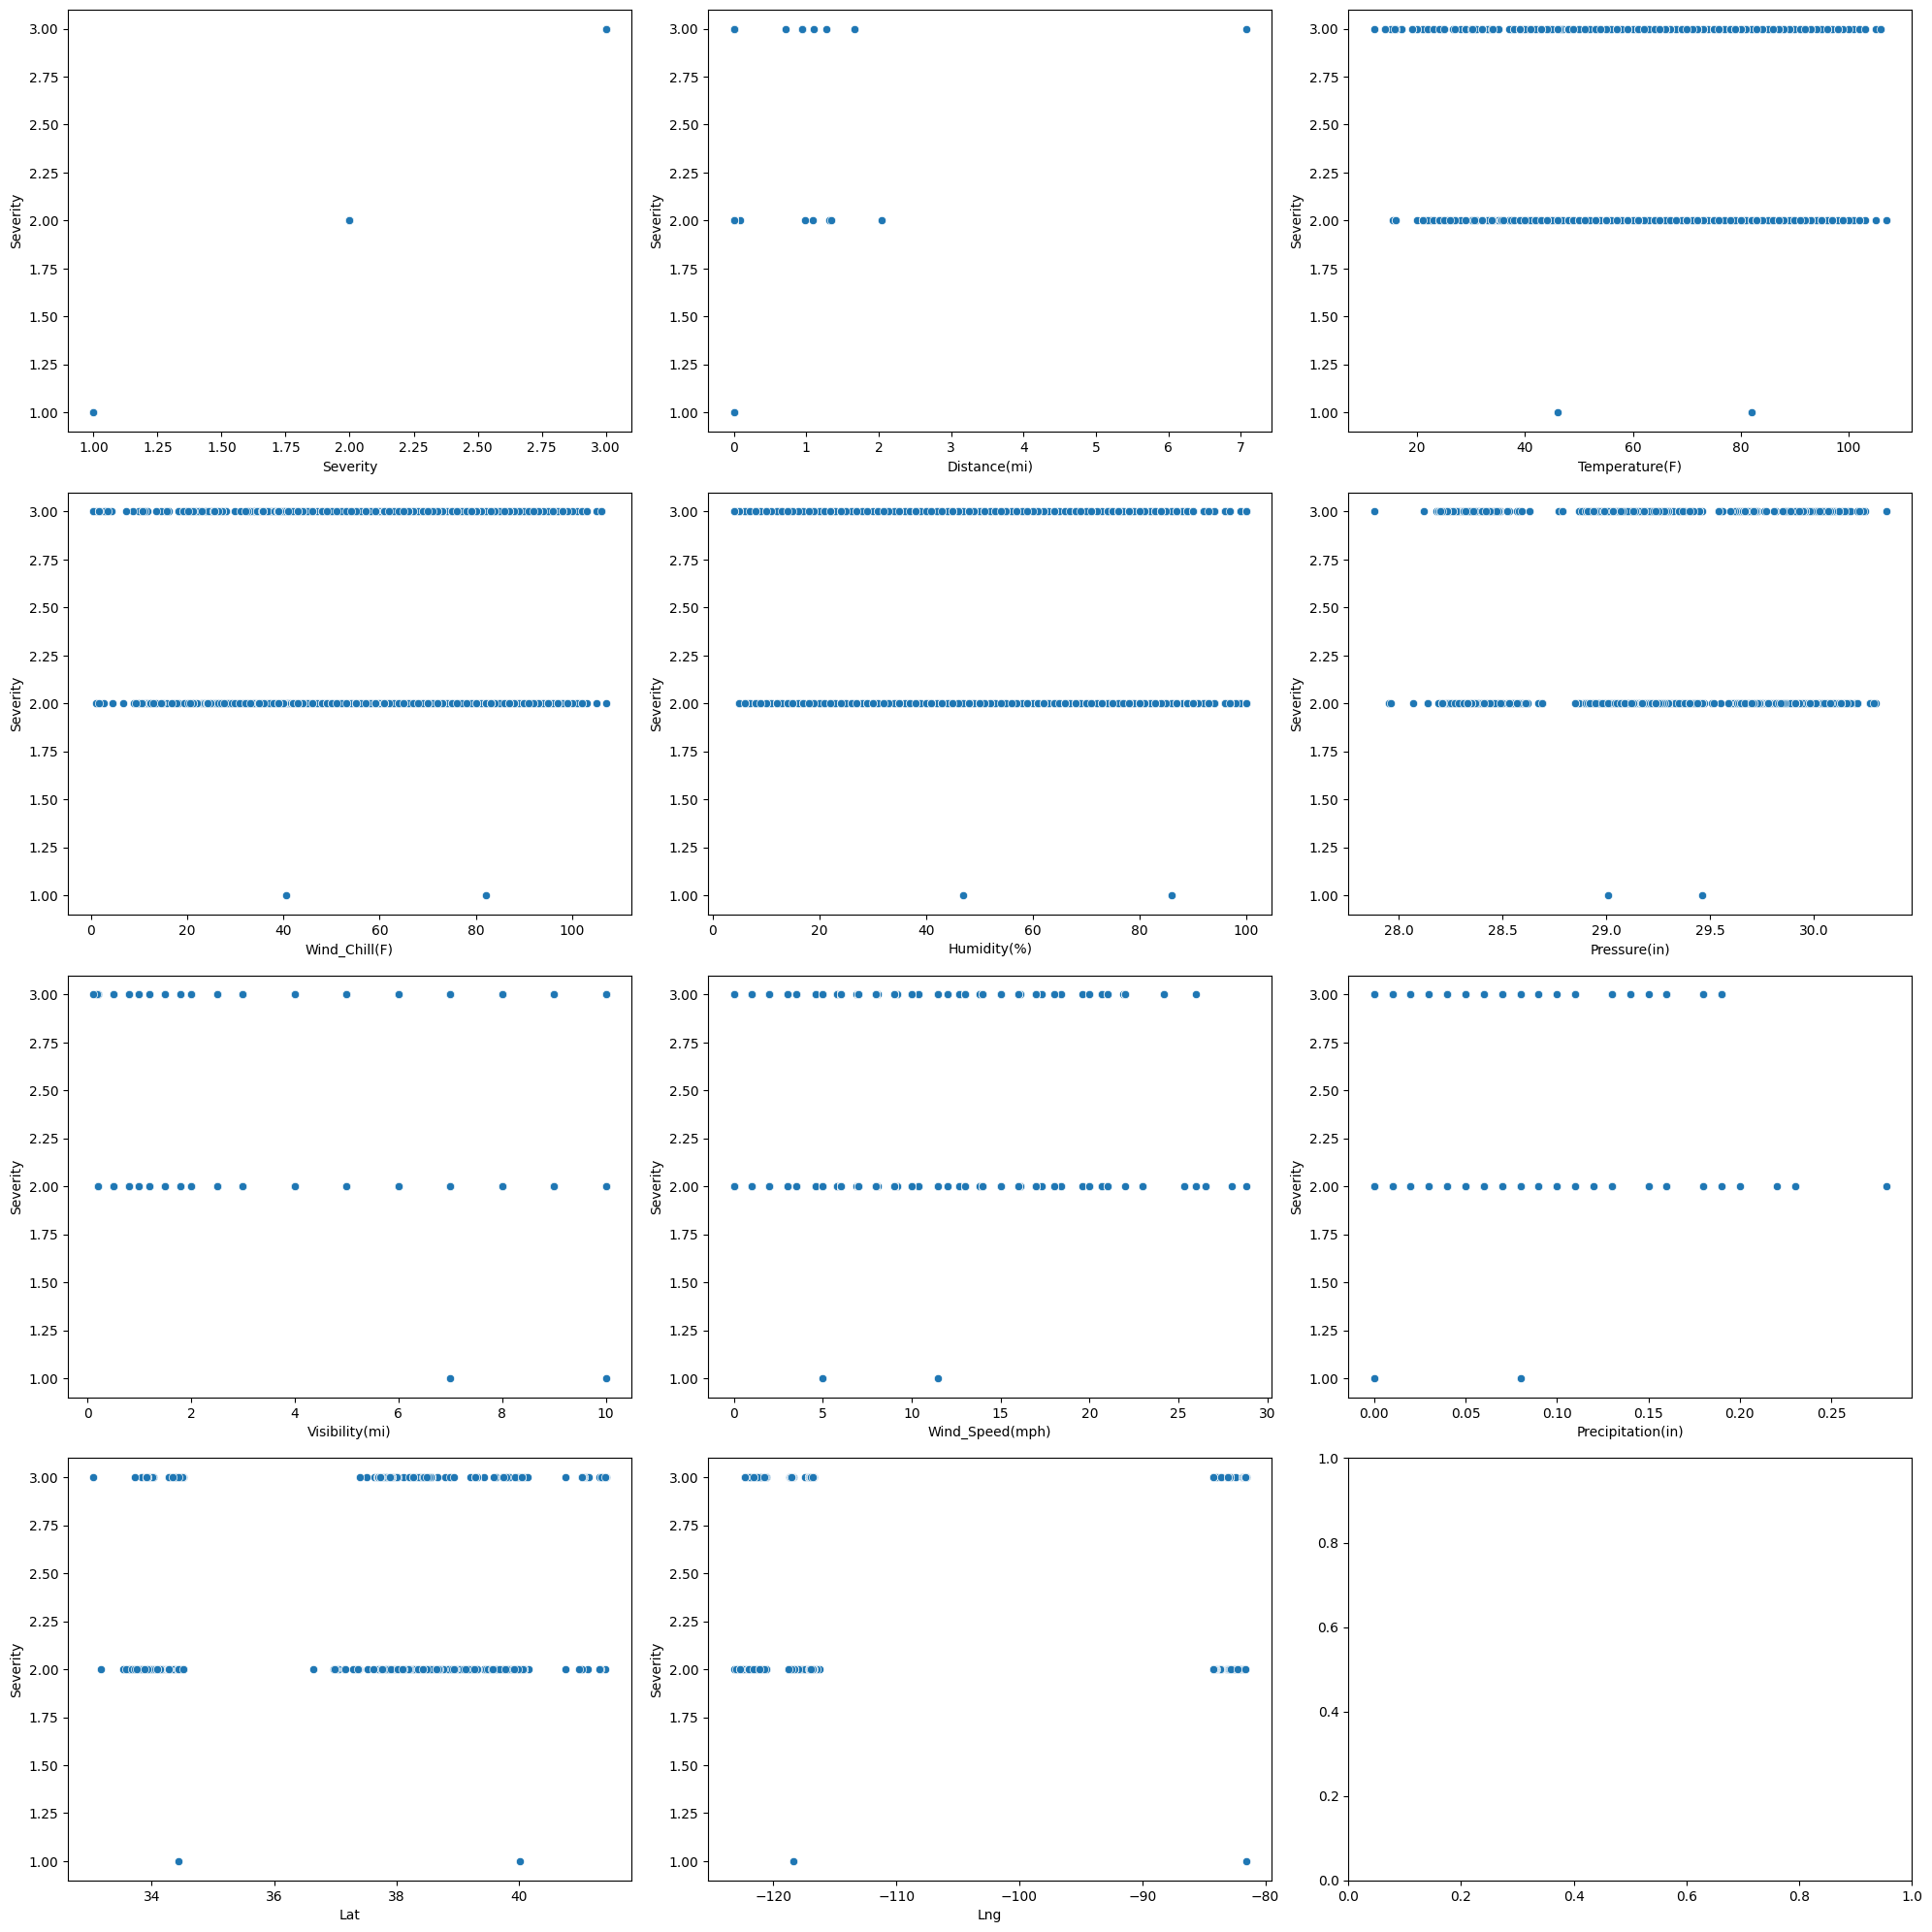

In [19]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes_flattened = axes.reshape(-1)

for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='Severity',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

In [20]:
num_df.describe()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Lat,Lng
count,100000.000000,100000.000000,98409.000000,4322.000000,98144.000000,98708.000000,98154.000000,76180.000000,7368.000000,100000.000000,100000.000000
mean,2.448120,0.011345,66.641262,48.845812,59.794170,29.961021,9.338639,8.044165,0.025786,35.630369,-119.322756
std,0.499931,0.262244,12.703846,19.898270,23.184442,0.275672,1.885828,4.298926,0.051695,2.101259,3.663525
min,1.000000,0.000000,3.200000,-8.400000,4.000000,2.980000,0.100000,0.000000,0.000000,32.542587,-123.813927
25%,2.000000,0.000000,57.900000,37.100000,43.000000,29.890000,10.000000,4.600000,0.000000,33.957775,-121.828468
50%,2.000000,0.000000,66.000000,42.500000,62.000000,29.970000,10.000000,6.900000,0.000000,34.168579,-118.384232
75%,3.000000,0.010000,75.000000,63.000000,78.000000,30.060000,10.000000,10.400000,0.030000,37.776682,-117.916023
max,4.000000,51.130000,114.100000,107.000000,100.000000,33.040000,80.000000,241.700000,0.550000,41.428753,-81.550728


In [21]:
num_df['Severity'].sort_values(ascending=True).unique()

array([1, 2, 3, 4])

In [22]:
num_df['Humidity(%)'].sort_values(ascending=True).unique()

array([  4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
        15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,
        26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
        81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,
        92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,  nan])

In [30]:
def corrplot(df_corr, method="pearson", annot=True, **kwargs):
    df_corr = df_corr.dropna()
    matrix_corr = df_corr.corr(method)
    sns.clustermap(
        df_corr.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )
    return matrix_corr

<class 'pandas.core.frame.DataFrame'>


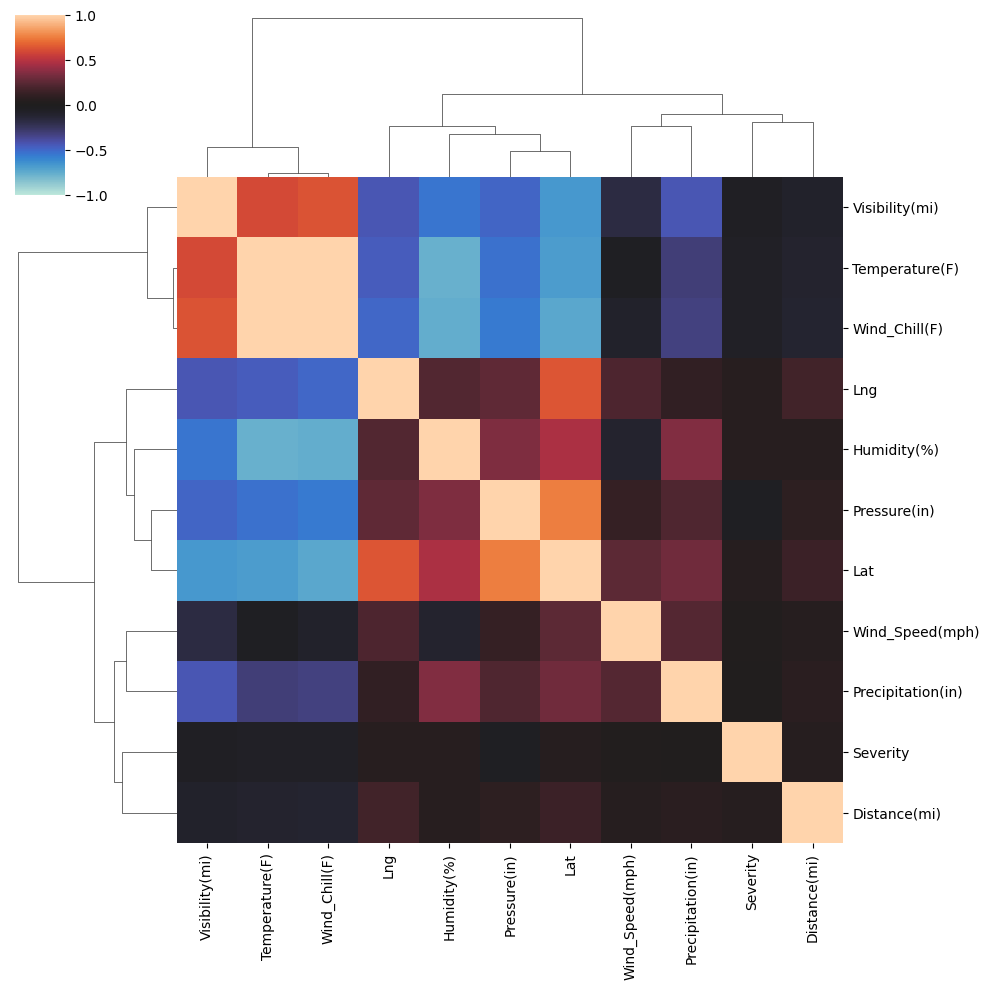

In [24]:
def corrplot(df_corr, method="pearson", annot=True, **kwargs):
    df_corr = df_corr.dropna()
    matrix_corr = df_corr.corr(method)
    print(type(matrix_corr))
    sns.clustermap(
        df_corr.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )
    return matrix_corr

matrix_corr = corrplot(num_df, annot=None)

In [25]:
matrix_corr

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Lat,Lng
Severity,1.000000,0.047506,-0.065012,-0.067047,0.056346,-0.039095,-0.047195,0.028102,0.022278,0.054557,0.061946
Distance(mi),0.047506,1.000000,-0.104962,-0.112322,0.062441,0.086192,-0.089187,0.048180,0.070490,0.141955,0.171447
Temperature(F),-0.065012,-0.104962,1.000000,0.994980,-0.771092,-0.529551,0.594854,-0.042268,-0.308116,-0.682068,-0.453692
Wind_Chill(F),-0.067047,-0.112322,0.994980,1.000000,-0.753708,-0.558465,0.625995,-0.093349,-0.320971,-0.731776,-0.499539
Humidity(%),0.056346,0.062441,-0.771092,-0.753708,1.000000,0.346063,-0.540573,-0.108197,0.354092,0.466493,0.221920
Pressure(in),-0.039095,0.086192,-0.529551,-0.558465,0.346063,1.000000,-0.485219,0.118867,0.218333,0.755458,0.261984
Visibility(mi),-0.047195,-0.089187,0.594854,0.625995,-0.540573,-0.485219,1.000000,-0.172832,-0.433543,-0.671559,-0.433002
Wind_Speed(mph),0.028102,0.048180,-0.042268,-0.093349,-0.108197,0.118867,-0.172832,1.000000,0.233942,0.251576,0.209823
Precipitation(in),0.022278,0.070490,-0.308116,-0.320971,0.354092,0.218333,-0.433543,0.233942,1.000000,0.308819,0.102806
Lat,0.054557,0.141955,-0.682068,-0.731776,0.466493,0.755458,-0.671559,0.251576,0.308819,1.000000,0.636313


In [26]:
df_train.drop(columns=['Wind_Chill(F)'], inplace=True)
num_df.drop(columns=['Wind_Chill(F)'], inplace=True)

In [27]:
nan_df = (df_train.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)

In [28]:
nan_df.head(20)

,column_name,percentage
20,Precipitation(in),92.632
19,Wind_Speed(mph),23.820
15,Humidity(%),1.856
17,Visibility(mi),1.846
21,Weather_Condition,1.604
14,Temperature(F),1.591
16,Pressure(in),1.292
18,Wind_Direction,1.064
12,Weather_Timestamp,1.054
9,Zipcode,0.007


In [29]:
nan_num_column = ['Wind_Speed(mph)', #mean
                  'Visibility(mi)', #mean
                  'Humidity(%)', #mean
                  'Temperature(F)', #mean
                  'Pressure(in)', #mean
                  'Precipitation(in)' #mean
                  ]

In [30]:
for using_column in nan_num_column:
    df_train[using_column] = df_train.groupby('Severity')[using_column].transform(lambda x: x.fillna(x.mean()))

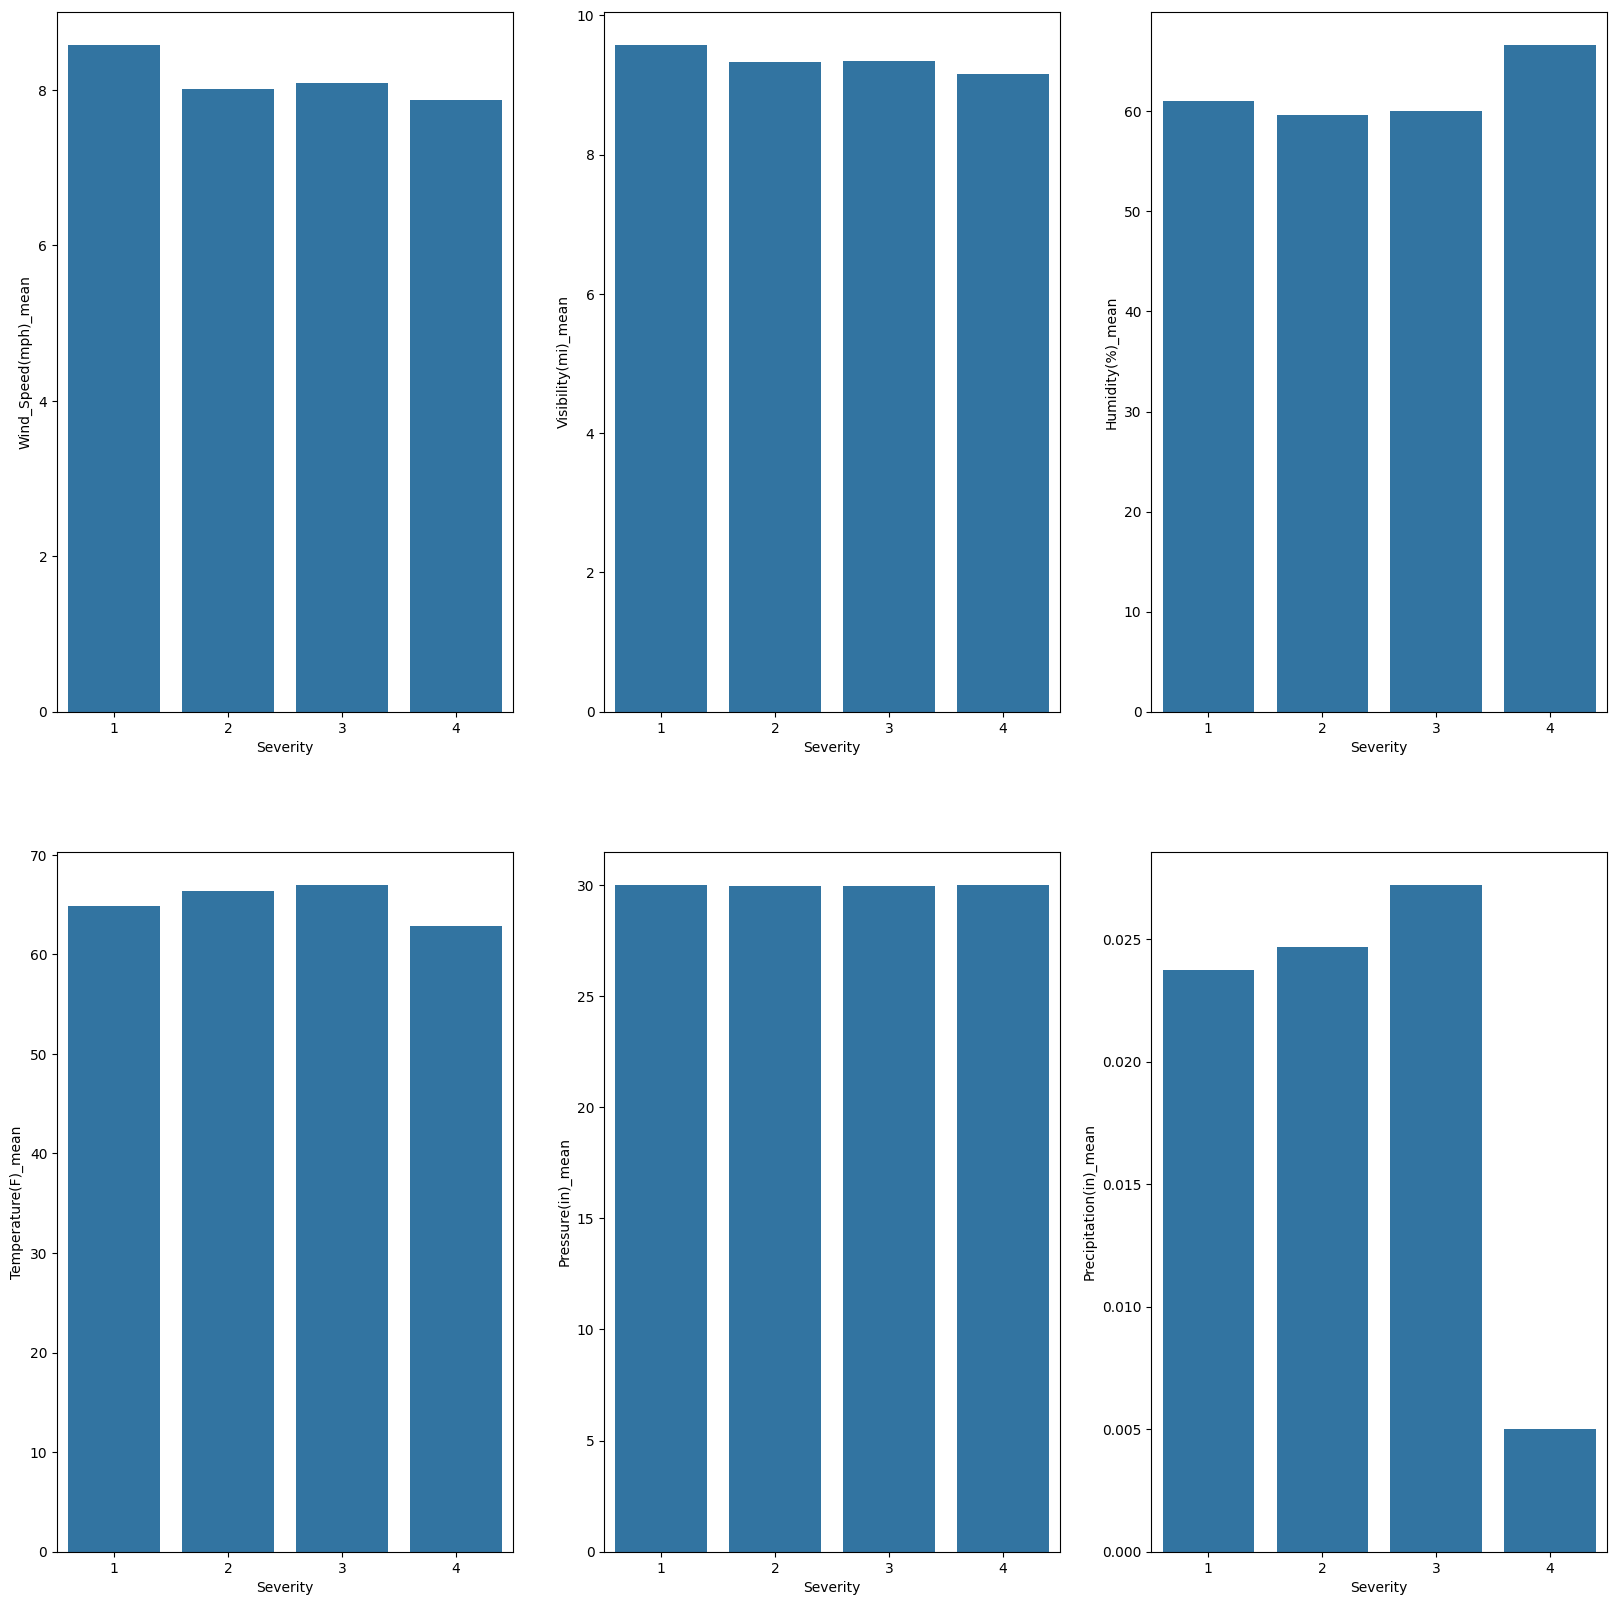

In [31]:
df_train[using_column].median(), df_train[using_column].mean()

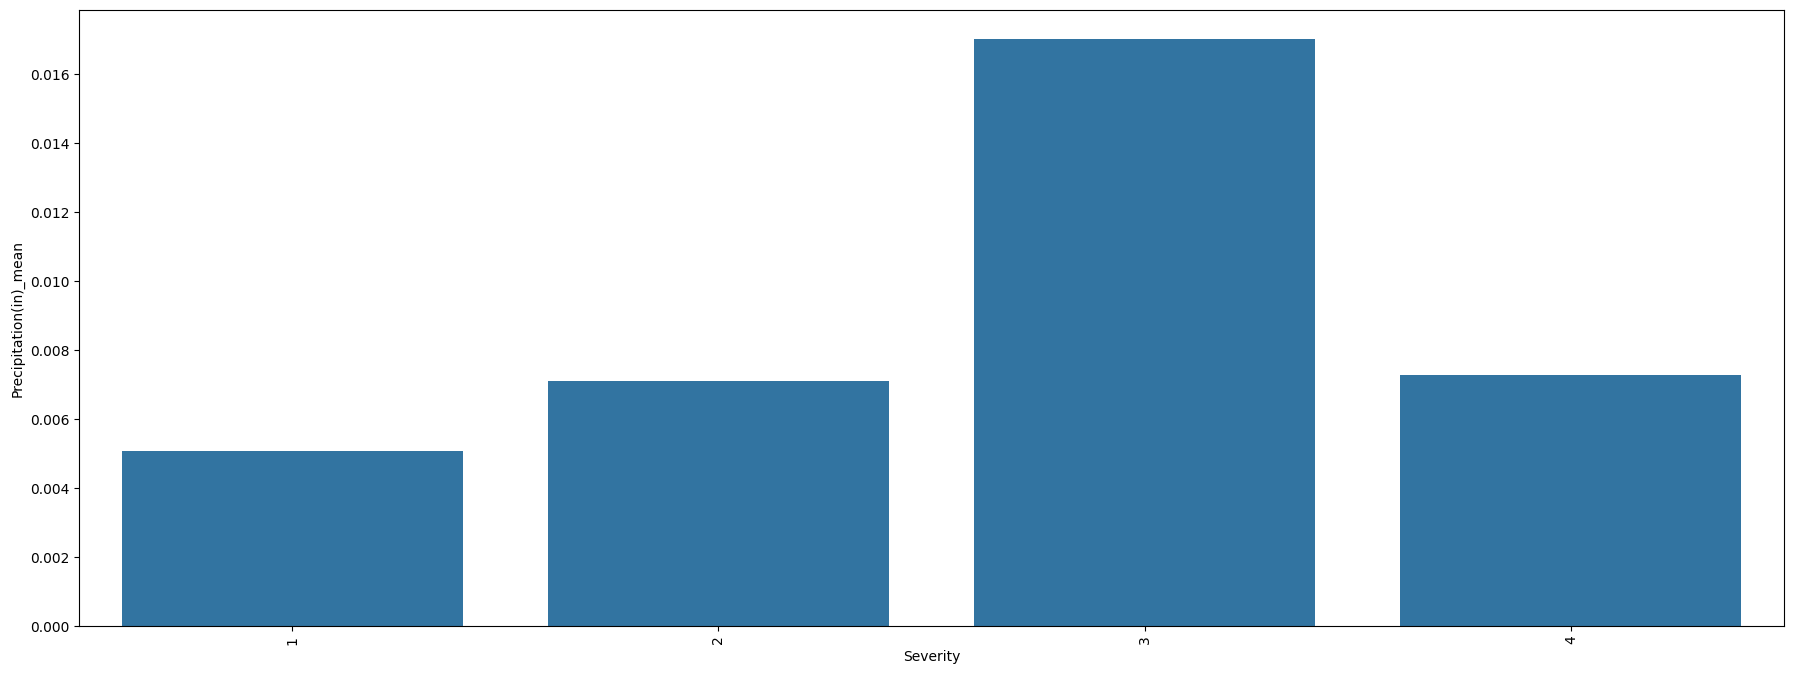

In [60]:
Severity_grouped = df_train.groupby('Severity')
Severity_lot = (
    Severity_grouped[using_column].mean()
    .reset_index(name=f"{using_column}_mean")
)

fig, axes = plt.subplots(1, 1, figsize=(22, 8))
axes.tick_params(axis='x', rotation=90)
sns.barplot(x='Severity', y=f"{using_column}_mean", data=Severity_lot, ax=axes)
plt.show()

In [61]:
df_train[using_column] = df_train.groupby('Severity')[using_column].transform(lambda x: x.fillna(x.mean()))

# Удаление столбцов с почти одними и теми же значениями

In [32]:
def get_almost_constant_columns(df: pd.DataFrame, dropna=True, limit: int = 96):
    cols = []
    for i in df:
        if dropna:
            counts = df[i].dropna().value_counts()
        else:
            counts = df[i].value_counts()
        most_popular_value_count = counts.iloc[0]
        if (most_popular_value_count / len(df)) * 100 - limit > 0:
            cols.append(i)
    return cols


In [33]:
overfit_cat = get_almost_constant_columns(cat_df, limit=96)
overfit_cat

['State', 'Country', 'Timezone']

In [34]:
df_train.drop(columns=["Country"], inplace=True)

In [35]:
overfit_num = get_almost_constant_columns(num_df, dropna=True, limit=96)
overfit_num

[]

In [36]:
overfit_bool = get_almost_constant_columns(bool_df, dropna=True, limit=99)
overfit_bool

['Amenity',
 'Bump',
 'Give_Way',
 'No_Exit',
 'Roundabout',
 'Traffic_Calming',
 'Turning_Loop']

In [37]:
df_train.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Lat', 'Lng'],
      dtype='object')

# Удаление выбросов

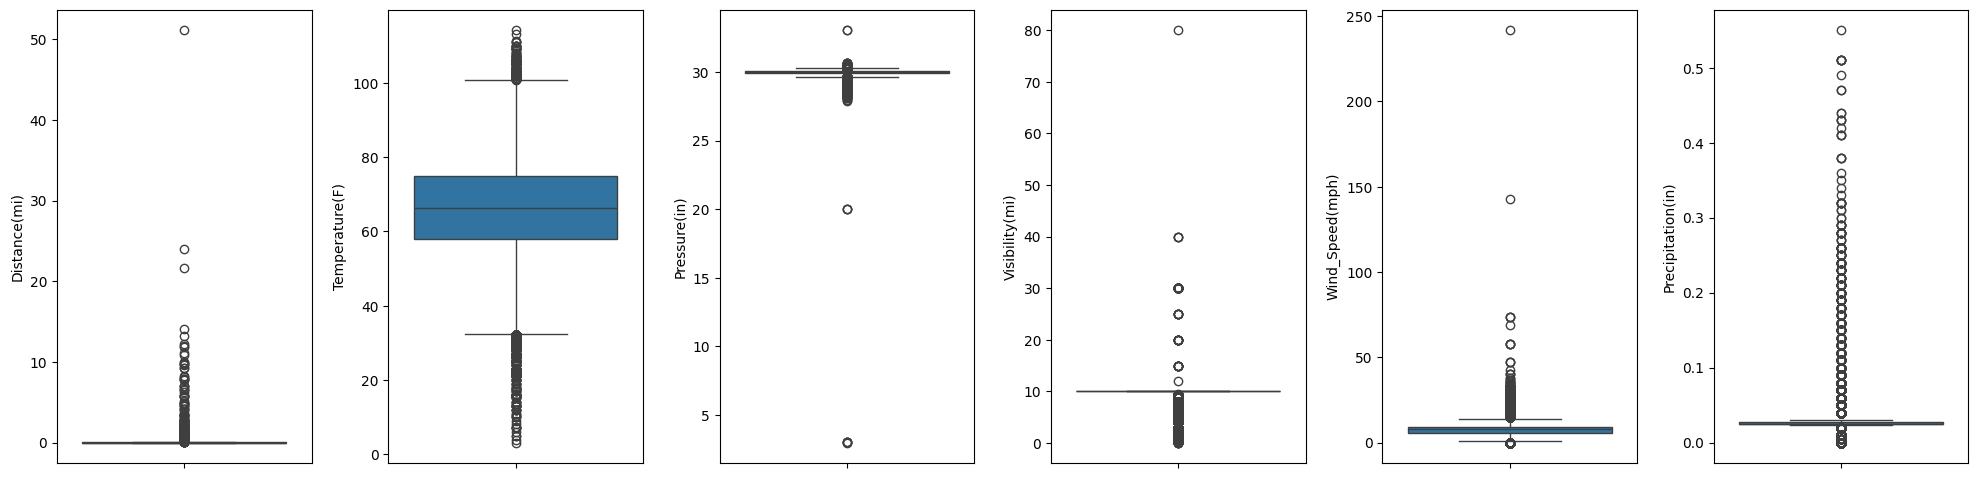

In [38]:
out_col = ["Distance(mi)", "Temperature(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]

fig, axes = plt.subplots(1, 6, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=df_train[col], data=df_train, ax=ax)
fig.tight_layout(pad=1.5)

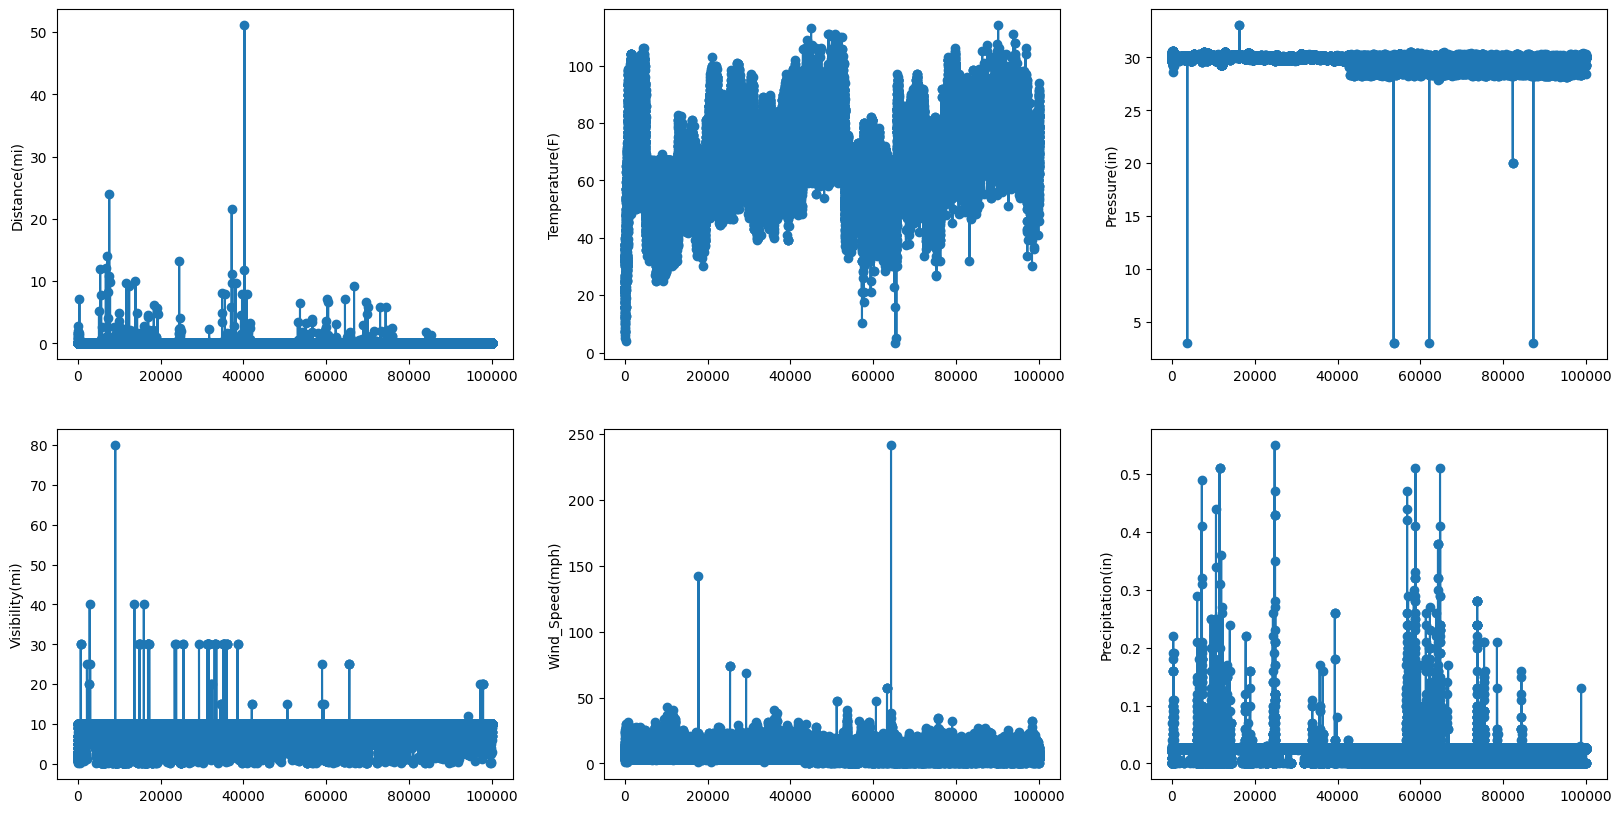

In [39]:
out_col = ["Distance(mi)", "Temperature(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_flattened = axes.flatten()

for index, column in enumerate(out_col):
    axes[index // 3][index % 3].plot(
        [i + 1 for i in range(len(df_train[column]))],
        df_train[column],
        marker='o'
    )
    axes[index // 3][index % 3].set_ylabel(column)

In [40]:
for col, upper_bound, down_bound in (
    ('Distance(mi)', 150, -150),
    ('Temperature(F)', 150, -50),
    ('Pressure(in)', 50, 10),
    ('Visibility(mi)', 100, -100),
    ('Wind_Speed(mph)', 400, -400),
    ("Precipitation(in)",10, -15),
):
    df = df.drop(df[df[col] > upper_bound].index)
    df = df.drop(df[df[col] < down_bound].index)

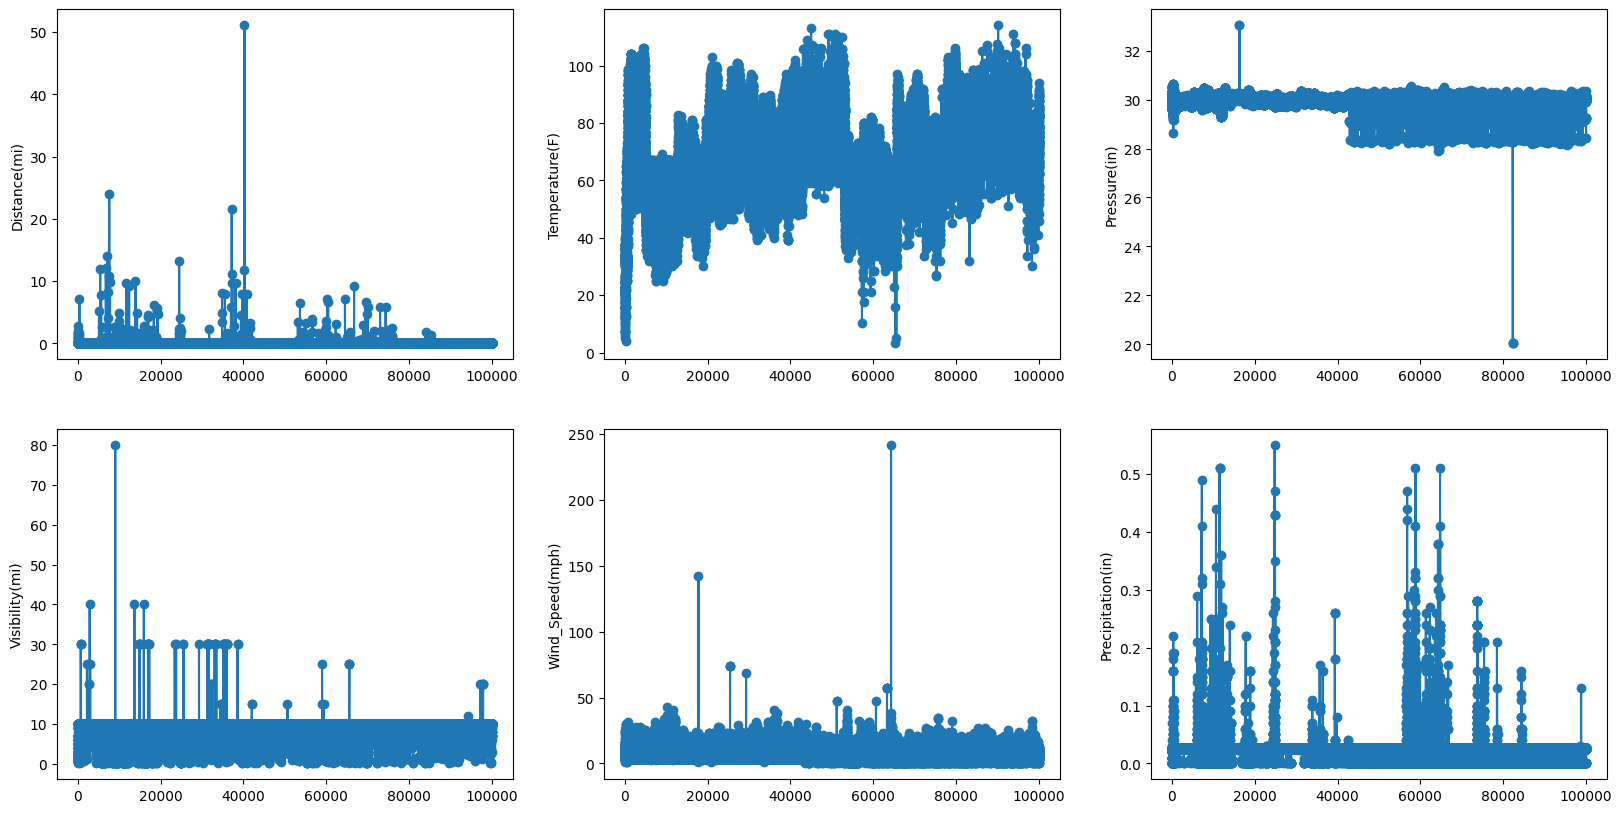

In [41]:
out_col = ["Distance(mi)", "Temperature(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_flattened = axes.flatten()

for index, column in enumerate(out_col):
    axes[index // 3][index % 3].plot(
        [i + 1 for i in range(len(df[column]))],
        df[column],
        marker='o'
    )
    axes[index // 3][index % 3].set_ylabel(column)

# Работа с категориальными признаками

In [42]:
df['Start_Time'] = pd.to_datetime(df['Start_Time']).dt.round("S")
df['End_Time'] = pd.to_datetime(df['End_Time']).dt.round("S")
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp']).dt.round("S")

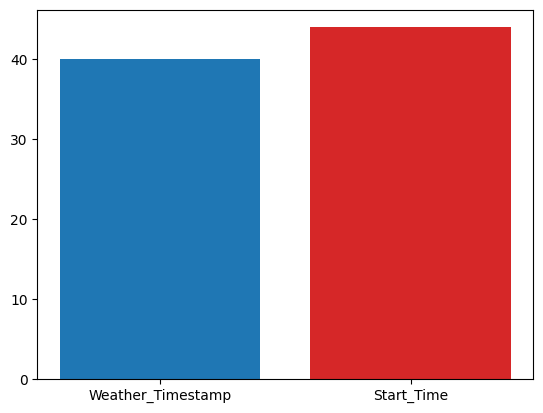

In [43]:
plt.plot([i + 1 for i in range(len(df_train))], df_train['Time_Difference'], marker='o')

In [44]:
cat_df.head()

,Start_Time,End_Time,Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7301655,2019-10-22 13:43:00,2019-10-22 14:14:31,At E St - Accident.,Capital City Fwy E,Sacramento,Sacramento,CA,95816,US/Pacific,KSAC,2019-10-22 13:53:00,NNW,Fair,Day,Day,Day,Day
6602351,2020-10-12 07:32:00,2020-10-12 08:47:28,Incident on US-17 near SW SKATES ST Drive with...,SW Highway 17,Arcadia,DeSoto,FL,34266-8102,US/Eastern,KPGD,2020-10-12 07:53:00,SSW,Partly Cloudy,Day,Day,Day,Day
4258452,2022-06-06 17:58:37.000000000,2022-06-06 20:02:17.000000000,Stationary traffic on FL-70 from Horseshoes Bl...,60th St E,Bradenton,Manatee,FL,34203,US/Eastern,KSRQ,2022-06-06 17:53:00,W,Fair,Day,Day,Day,Day
5270654,2022-12-16 20:23:31,2022-12-16 21:38:31,Incident on DALLAS PKWY near SOUTHERN BLVD Dri...,Dallas Pkwy,Dallas,Dallas,TX,75240-4334,US/Central,KADS,2022-12-16 20:15:00,WNW,Fair,Night,Night,Night,Night
5921883,2021-09-10 03:59:30,2021-09-10 04:42:30,Stationary traffic on CA-160 - CA-12 at Isleto...,State Highway 12,Isleton,Sacramento,CA,95641,US/Pacific,KSUU,2021-09-10 03:58:00,SW,Mostly Cloudy,Night,Night,Night,Night


In [45]:
df['Start_Date_Year'] = df['Start_Time'].dt.year
df['Start_Date_Month'] = df['Start_Time'].dt.month
df['Start_Date_Day'] = df['Start_Time'].dt.day
df['Start_Date_Hour'] = df['Start_Time'].dt.hour

df['End_Date_Year'] = df['End_Time'].dt.year
df['End_Date_Month'] = df['End_Time'].dt.month
df['End_Date_Day'] = df['End_Time'].dt.day
df['End_Date_Hour'] = df['End_Time'].dt.hour

df['Weather_Datestamp_Year'] = df['Weather_Timestamp'].dt.year
df['Weather_Datestamp_Month'] = df['Weather_Timestamp'].dt.month
df['Weather_Datestamp_Day'] = df['Weather_Timestamp'].dt.day
df['Weather_Datestamp_Hour'] = df['Weather_Timestamp'].dt.hour

In [46]:
df['Time_Difference'] = round((df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60)

In [47]:
df.drop(columns=['Weather_Timestamp', 'Start_Time', 'End_Time'], inplace=True)

In [48]:
new_Twilight_names = {
    'Sunrise_Sunset': 'Is_Day',
    "Civil_Twilight": "Is_Civil_Day",
    "Nautical_Twilight": "Is_Twilight_Day",
    "Astronomical_Twilight": "Is_Astronomical_Day"
}
for column in new_Twilight_names.keys():
    df_train[new_Twilight_names[column]] = df[column].map({'Day': True, 'Night': False}).astype(bool)
df_train.drop(columns=list(new_Twilight_names.keys()), inplace=True)
    
df_train

In [49]:
df['Is_Day']

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    1.0
99999    1.0
Name: Is_Day, Length: 99995, dtype: float64

In [50]:
df['Is_Astronomical_Day']

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    1.0
99999    1.0
Name: Is_Astronomical_Day, Length: 99995, dtype: float64

In [51]:
df['Is_Civil_Day']

0        0.0
1        0.0
2        0.0
3        1.0
4        1.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    1.0
99999    1.0
Name: Is_Civil_Day, Length: 99995, dtype: float64

In [52]:
num_df = df_train.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
bool_df = df_train.select_dtypes(exclude=['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'object'])
cat_df = df_train.select_dtypes(include=['object'])
len(num_df.columns), len(bool_df.columns), len(cat_df.columns)

(27, 13, 10)

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: >]


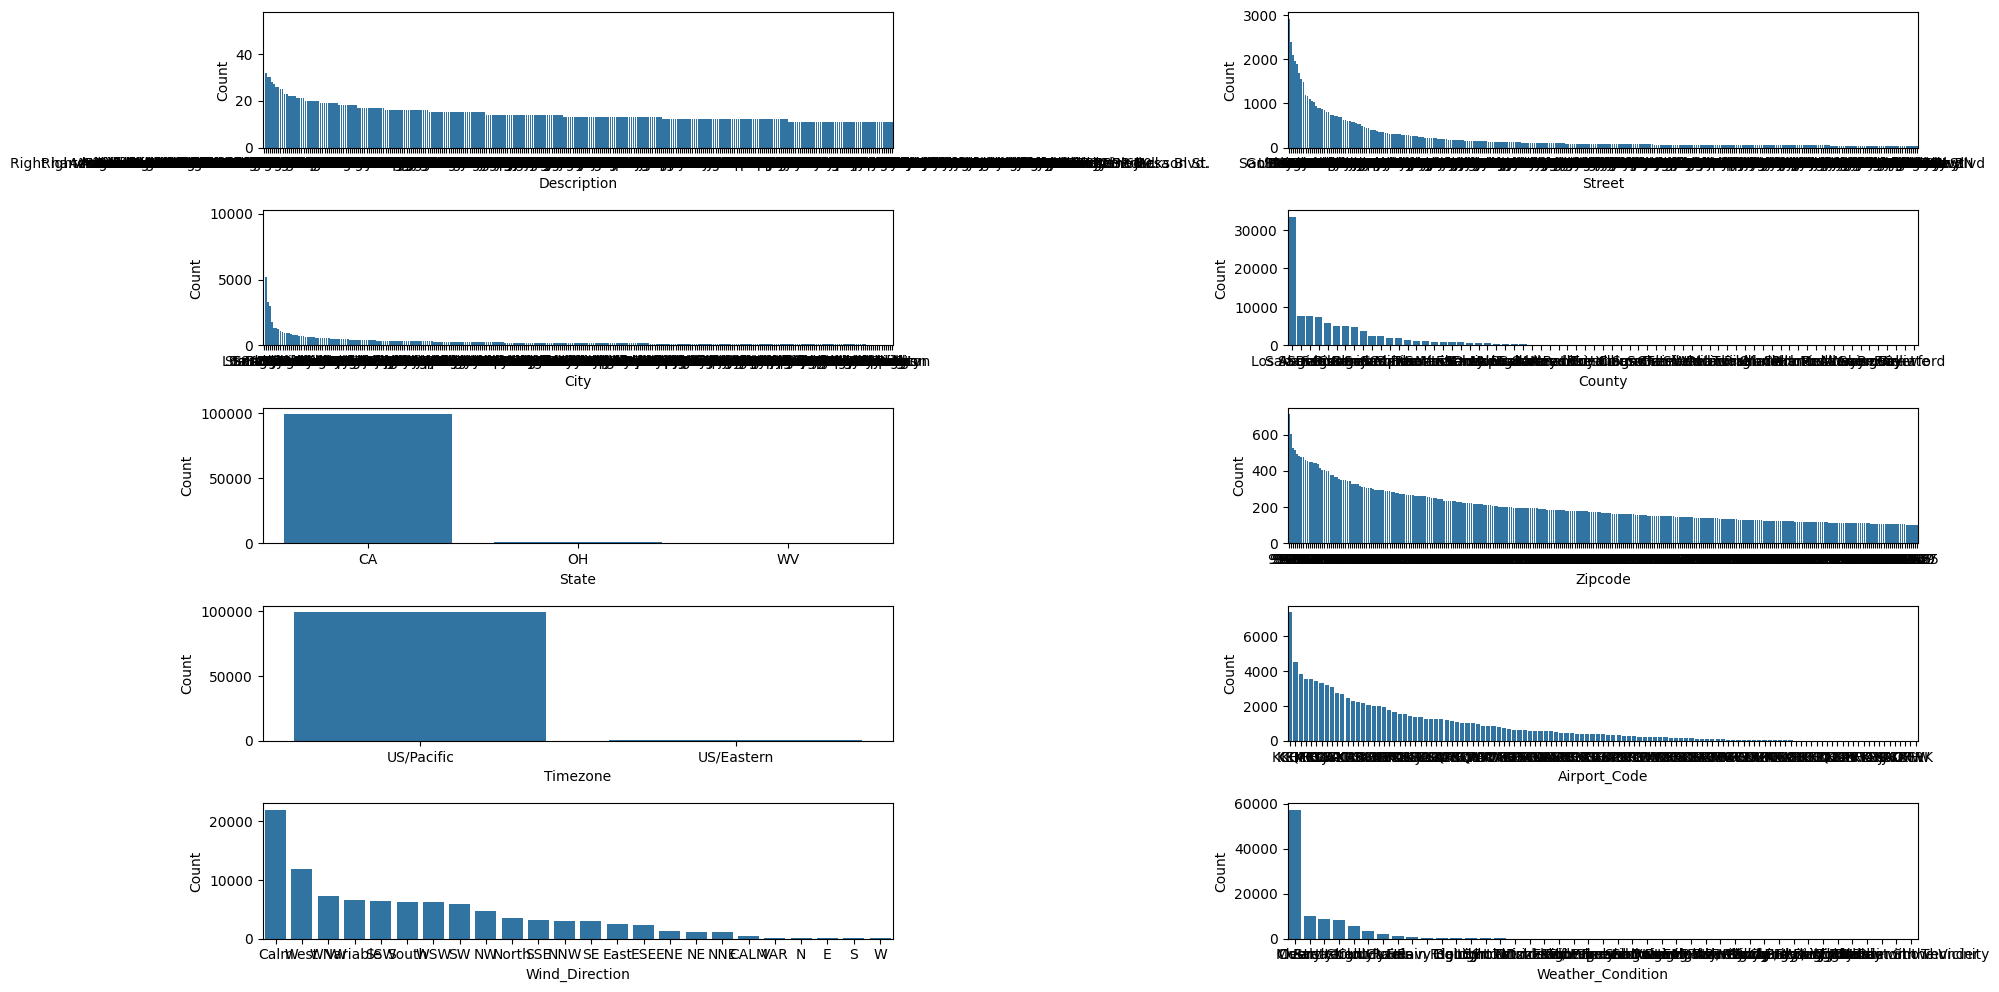

In [53]:
fig, axes = plt.subplots(5, 2, figsize=(20, 10))
axes_flattened = axes.reshape(-1)
count = 300
print(axes_flattened)
for idx, column in enumerate(cat_df.columns):
    ax = axes_flattened[idx]
    value_counts = df_train[column].value_counts()
    viz_df = pd.DataFrame({column: value_counts.index[:100], 'Count': value_counts.values[:100]})
    sns.barplot(
        x=column,
        y='Count',
        data=viz_df.dropna(),
        ax=ax
        )
    
fig.tight_layout(pad=1.0)

In [54]:
df.drop(columns=['Zipcode', 'Airport_Code', 'Description'], inplace=True)

In [55]:
df['Timezone'] = df['Timezone'].replace({
    "US/Eastern": "Easterm",
    "US/Central": "Central",
    "US/Pacific": "Pacific",
    "US/Mountain": "Mountain"
})

In [56]:
nan_df = (df_train.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(10)

,column_name,percentage
17,Wind_Direction,2.266368
20,Weather_Condition,1.604080
11,Wind_Direction,1.064053
6,Timezone,0.007000
46,Is_Astronomical_Day,0.001000
45,Is_Twilight_Day,0.001000
3,City,0.001000
44,Is_Civil_Day,0.001000
43,Is_Day,0.001000
35,End_Date_Month,0.000000


In [57]:
def filter_by_mean_frequency(df: pd.DataFrame, column: str, frequency: int) -> pd.DataFrame:
    freq = df[column].value_counts()
    frequent_values = freq[freq >= frequency].index
    return df[df[column].isin(frequent_values)]

In [58]:
df['Weather_Condition'] = df['Weather_Condition'].replace({"N/A": np.nan})

In [59]:
Processed_Weather_Condition = df.dropna()['Weather_Condition'].apply(
    lambda x: ' '.join(
        set(
            sorted(
                    [
                    replacement_words[word] for word in x.split(" ") if word in replacement_words.keys()
                    ]
                )
            )
        ) 
    )
for index in Processed_Weather_Condition.index:
    if 'Mix' in Processed_Weather_Condition[index]:
        Processed_Weather_Condition[index] = 'Mix'
        
df['Weather_Condition'] = Processed_Weather_Condition.replace({'': np.nan})

In [60]:
df['Weather_Condition'] = df.groupby('Severity')['Weather_Condition'].transform(lambda x: x.fillna(x.mode()[0]))

['Rain', 'Cloudy', 'Snow', 'Fog', 'Clear', 'Fair']


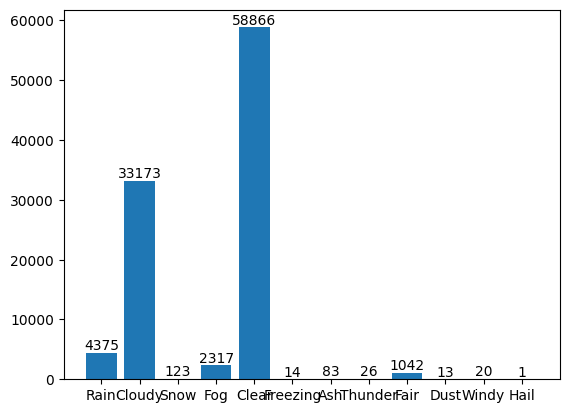

In [61]:
words = set()
repeat_count = dict()
for line in df['Weather_Condition']:
    for word in line.split(" "):
        if word in words:
            repeat_count[word] += 1
        else:
            words.add(word)
            repeat_count[word] = 1    
            
print([word for word in repeat_count.keys() if repeat_count[word] >= 100])

plt.bar(repeat_count.keys(), repeat_count.values())
for idx, count in enumerate(repeat_count.values()):
    plt.text(idx, count, str(count), ha='center', va='bottom')

In [62]:
new_columns = np.zeros((len(words), len(df)), dtype=float)

for i, line in enumerate(df['Weather_Condition']):
    line_words = set(line.split(" "))
    for k, word in enumerate(words):
        if word in line_words:
            new_columns[k][i] = 1.0
            
for idx, word in enumerate(words):
    new_column = pd.Series(new_columns[idx])
    new_column.index = df.index
    df[word] = new_column
    

In [63]:
df.drop(columns=['Weather_Condition'], inplace=True)

In [64]:
df['Wind_Direction'] = df['Wind_Direction'].replace({'South': 'S',
                                                                 'West': 'W',
                                                                 'North': 'N',
                                                                 'Variable': 'VAR',
                                                                 'East': 'E',
                                                                 'Calm': 'CALM'
                                                                 })

In [65]:
df['Wind_Direction'].fillna('VAR', inplace=True)

Почему выкидываем Street:
1) есть Штат, Округ, Координаты. Для нашей задачи этого достаточно
2) На необработанных слишком много классов
3) Слишком проблемно обрабатывать

In [66]:
df.drop(columns=['Street'], inplace=True)

In [67]:
df.dropna(inplace=True)

In [68]:
onehot_encoder = OneHotEncoder(sparse_output=False, min_frequency=5*10**(-4), handle_unknown="ignore")

encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(df[['Timezone', 'Wind_Direction']]))

encoded_categorical_columns.columns = onehot_encoder.get_feature_names_out()
encoded_categorical_columns.index = df.index

encoded_categorical_columns

,Timezone_Easterm,Timezone_Pacific,Wind_Direction_CALM,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_VAR,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [69]:
for column_name in onehot_encoder.get_feature_names_out():
    df[column_name] = encoded_categorical_columns[column_name]

In [70]:
df.drop(columns=['Timezone', 'Wind_Direction'], inplace=True)

In [71]:
count_encoder_city = ce.CountEncoder(normalize=True)
df['City_Encoded'] = count_encoder_city.fit_transform(df['City'])

count_encoder_county = ce.CountEncoder(normalize=True)
df['County_Encoded'] = count_encoder_city.fit_transform(df['County'])

In [72]:
df['City_Encoded']

0        0.003210
1        0.000050
2        0.000010
3        0.003210
4        0.003210
           ...   
99995    0.032754
99996    0.005441
99997    0.002380
99998    0.012612
99999    0.010181
Name: City_Encoded, Length: 99987, dtype: float64

In [73]:
df.drop(columns=['County', 'City'], inplace=True)

In [74]:
label_encoder_state = LabelEncoder()
encoded = pd.Series(label_encoder_state.fit_transform(df['State']))
encoded.index = df.index
df['State_Encoded'] = encoded

In [75]:
df['State_Encoded']

0        1
1        1
2        1
3        1
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: State_Encoded, Length: 99987, dtype: int64

In [76]:
df.drop(columns=['State'], inplace=True)

# Работа с булевыми признаками

In [77]:
for column in bool_df.columns:
    df[column] = df[column].map({True: 1.0, False: 0.0}).astype(float)

# Общий просмотр всех признаков

In [78]:
df.columns

Index(['Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Lat', 'Lng',
       'Start_Date_Year', 'Start_Date_Month', 'Start_Date_Day',
       'Start_Date_Hour', 'End_Date_Year', 'End_Date_Month', 'End_Date_Day',
       'End_Date_Hour', 'Weather_Datestamp_Year', 'Weather_Datestamp_Month',
       'Weather_Datestamp_Day', 'Weather_Datestamp_Hour', 'Time_Difference',
       'Is_Day', 'Is_Civil_Day', 'Is_Twilight_Day', 'Is_Astronomical_Day',
       'Rain', 'Fair', 'Windy', 'Fog', 'Clear', 'Ash', 'Dust', 'Thunder',
       'Freezing', 'Cloudy', 'Hail', 'Snow', 'Timezone_Easterm',
       'Timezone_Pacific', 'Wind_Direction_CALM', 'Wind_Direction_E',
       'Wind_Direction_ENE', 'Wind_Direction_ESE', 'Wind_Direction_N',
   

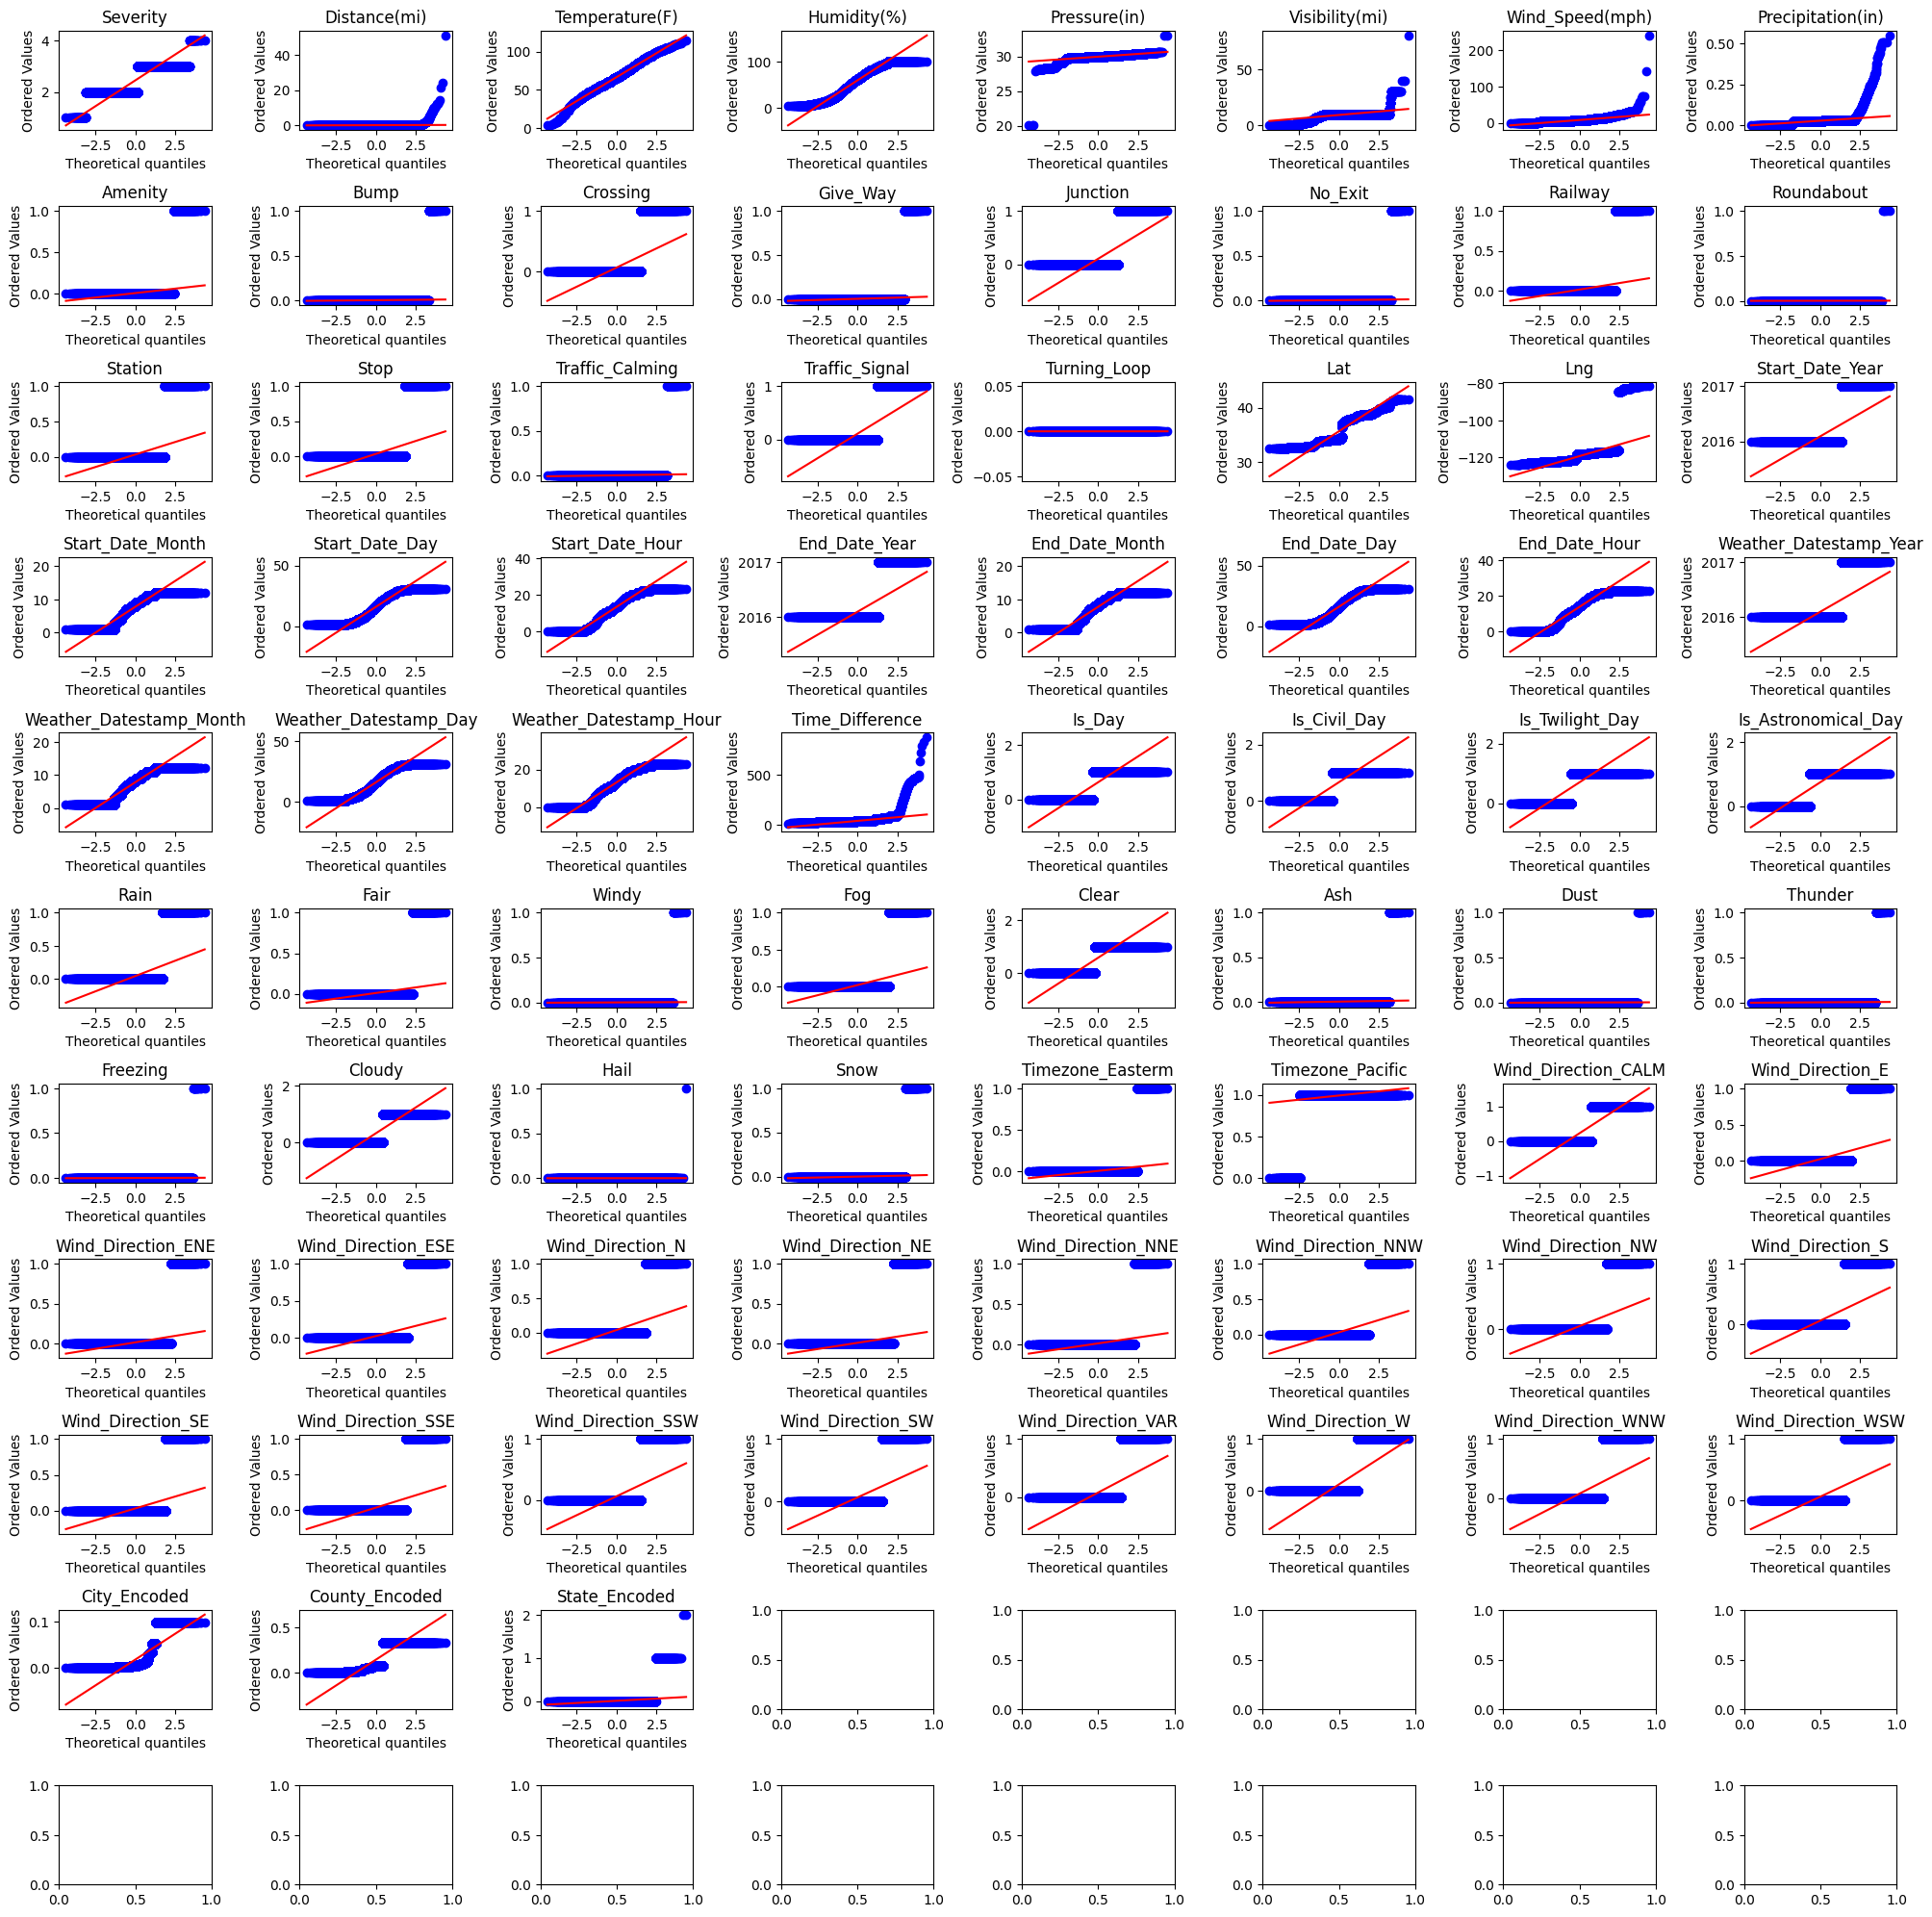

In [79]:
fig, axes = plt.subplots(11, 8, figsize=(20, 20))
axes_flattened = axes.reshape(-1)

for idx, col_name in enumerate(df.columns):
    ax = axes_flattened[idx]
    stats.probplot(df[col_name], dist="norm", plot=ax)
    ax.set_title(col_name)
    
fig.tight_layout(pad=1.0)

# Обучение модели

## Получение и обработка данных

In [7]:
def conversion_boolean_features(df: pd.DataFrame) -> pd.DataFrame:
    bool_df = df.select_dtypes(exclude=['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'object'])
    for column in bool_df.columns:
        df[column] = df[column].map({True: 1.0, False: 0.0}).astype(float)
        
    return df

In [8]:
def add_column_mean_coordinate(start: pd.Series, end: pd.Series) -> pd.Series:
    fill_end = end.fillna(start)
    new_series = (start + fill_end) / 2
    return new_series

def add_mean_coordeenates_parametres(df: pd.DataFrame) -> pd.DataFrame:
    df['Lat'] = add_column_mean_coordinate(df['Start_Lat'], df['End_Lat'])
    df['Lng'] = add_column_mean_coordinate(df['Start_Lng'], df['End_Lng'])
    
    return df

In [9]:
nan_num_column = ['Wind_Speed(mph)', #mean
                  'Visibility(mi)', #mean
                  'Humidity(%)', #mean
                  'Temperature(F)', #mean
                  'Pressure(in)', #mean
                  'Precipitation(in)' #mean
                  ]

def fill_num_columns(df: pd.DataFrame) -> pd.DataFrame:
    for col_name in nan_num_column:
        df[col_name] = df.groupby('Severity')[col_name].transform(lambda x: x.fillna(x.mean()))
        
    return df

In [10]:
def delete_emissions(df: pd.DataFrame) -> pd.DataFrame:
    for col, upper_bound, down_bound in (
        ('Distance(mi)', 150, -150),
        ('Temperature(F)', 150, -50),
        ('Pressure(in)', 50, 10),
        ('Visibility(mi)', 100, -100),
        ('Wind_Speed(mph)', 400, -400),
        ("Precipitation(in)",10, -15),
    ):
        df = df.drop(df[df[col] > upper_bound].index)
        df = df.drop(df[df[col] < down_bound].index)
        
    return df

In [20]:
def process_time_parametres(df: pd.DataFrame) -> pd.DataFrame:
    df['Start_Time'] = pd.to_datetime(df['Start_Time']).dt.round("S")
    df['End_Time'] = pd.to_datetime(df['End_Time']).dt.round("S")
    df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp']).dt.round("S")

    df.loc[df['Weather_Timestamp'].isna(), 'Weather_Timestamp'] = df['Start_Time'].loc[df['Weather_Timestamp'].isna()]

    df['Start_Date_Year'] = df['Start_Time'].dt.year
    df['Start_Date_Month'] = df['Start_Time'].dt.month
    df['Start_Date_Day'] = df['Start_Time'].dt.day
    df['Start_Date_Hour'] = df['Start_Time'].dt.hour

    df['End_Date_Year'] = df['End_Time'].dt.year
    df['End_Date_Month'] = df['End_Time'].dt.month
    df['End_Date_Day'] = df['End_Time'].dt.day
    df['End_Date_Hour'] = df['End_Time'].dt.hour

    df['Weather_Datestamp_Year'] = df['Weather_Timestamp'].dt.year
    df['Weather_Datestamp_Month'] = df['Weather_Timestamp'].dt.month
    df['Weather_Datestamp_Day'] = df['Weather_Timestamp'].dt.day
    df['Weather_Datestamp_Hour'] = df['Weather_Timestamp'].dt.hour
    
    return df

In [12]:
new_Twilight_names = {
    'Sunrise_Sunset': 'Is_Day',
    "Civil_Twilight": "Is_Civil_Day",
    "Nautical_Twilight": "Is_Twilight_Day",
    "Astronomical_Twilight": "Is_Astronomical_Day"
}
def rename_Twillight_parametres(df: pd.DataFrame) -> pd.DataFrame:
    for column in new_Twilight_names.keys():
        df[new_Twilight_names[column]] = df[column].map({'Day': 1.0, 'Night': 0.0}).astype(float)
    df.drop(columns=list(new_Twilight_names.keys()), inplace=True)
    
    return df

In [13]:
def rename_Timezone_meanings(df: pd.DataFrame) -> pd.DataFrame:
    df['Timezone'] = df['Timezone'].replace({
        "US/Eastern": "Easterm",
        "US/Central": "Central",
        "US/Pacific": "Pacific",
        "US/Mountain": "Mountain"
    })
    
    return df

In [14]:
def rename_Wind_Direction_paramentres(df: pd.DataFrame) -> pd.DataFrame:
    df['Wind_Direction'] = df['Wind_Direction'].replace({'South': 'S',
                                                                     'West': 'W',
                                                                     'North': 'N',
                                                                     'Variable': 'VAR',
                                                                     'East': 'E',
                                                                     'Calm': 'CALM'
                                                                     })

    df['Wind_Direction'].fillna('VAR', inplace=True)
    
    return df

In [15]:
def drop_excess_parametres(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop(columns=['ID',
                           'Source',
                           'Start_Lat',
                           'Start_Lng',
                           'End_Lat',
                           'End_Lng',
                           'Wind_Chill(F)',
                           'Country',
                           'Zipcode',
                           'Airport_Code',
                           'Description',
                           'Street',
                           'Weather_Timestamp',
                           'Start_Time',
                           'End_Time',
                           ])
    
    df = df.dropna()
    
    return df

In [16]:
def rename_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = rename_Twillight_parametres(df)
    df = rename_Timezone_meanings(df)
    df = rename_Wind_Direction_paramentres(df)
    
    return df

In [17]:
def data_condersion(df: pd.DataFrame) -> pd.DataFrame:
    
    df = conversion_boolean_features(df)
    df = add_mean_coordeenates_parametres(df)
    df = fill_num_columns(df)
    df = delete_emissions(df)
    df = process_time_parametres(df)
    df = rename_columns(df)
    
    return df
    

In [18]:
class WeatherEncoder(TransformerMixin):
    def __init__(self) -> None:
        super().__init__()
        self.words_ = None
        self.replacement_words_ = None
        with open(cfg['type_weather']) as file:
            self.replacement_words_ = json.load(file)
            
    def fit(self, X: NDArray, y: NDArray = None) -> None:
        self.words_ = set()
        Processed_Weather_Condition = X.dropna().apply(
            lambda x: ' '.join(
                set(
                    sorted(
                            [
                            self.replacement_words_[word] for word in x.split(" ") if word in self.replacement_words_.keys()
                            ]
                        )
                    )
                ) 
            )

        for index in Processed_Weather_Condition.index:
            if 'Mix' in Processed_Weather_Condition[index]:
                Processed_Weather_Condition[index] = 'Mix'

        X = Processed_Weather_Condition.replace({'': np.nan})
        X.fillna(X.mode()[0], inplace=True)

        for line in X:
            for word in line.split(" "):
                if not word in self.words_:
                    self.words_.add(word)
                    
        return self
                    
    def transform(self, X: pd.Series) -> pd.Series:      
        X.fillna(X.mode()[0], inplace=True)
        new_columns = np.zeros((len(self.words_), len(X)), dtype=float)

        for i, line in enumerate(X):
            line_words = set(line.split(" "))
            for k, word in enumerate(self.words_):
                if word in line_words:
                    new_columns[k][i] = 1.0

        return_columns = dict()
        for idx, word in enumerate(self.words_):
            new_column = pd.Series(new_columns[idx])
            new_column.index = X.index
            return_columns[word] = new_column
            
        return pd.DataFrame(return_columns)

In [94]:
df = pd.read_csv(cfg["dataset_maus"])

In [21]:
df = data_condersion(df)

In [22]:
onehot_encoder = OneHotEncoder(sparse_output=False, min_frequency=5*10**(-4), handle_unknown="ignore")

encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(df[['Timezone', 'Wind_Direction']]))

encoded_categorical_columns.columns = onehot_encoder.get_feature_names_out()
encoded_categorical_columns.index = df.index

for column_name in onehot_encoder.get_feature_names_out():
    df[column_name] = encoded_categorical_columns[column_name]


In [23]:
count_encoder_city = ce.CountEncoder(normalize=True)
df['City_Encoded'] = count_encoder_city.fit_transform(df['City'])

In [24]:
count_encoder_county = ce.CountEncoder(normalize=True)
df['County_Encoded'] = count_encoder_county.fit_transform(df['County'])

In [25]:
label_encoder_state = LabelEncoder()
encoded = pd.Series(label_encoder_state.fit_transform(df['State']))
encoded.index = df.index
df['State_Encoded'] = encoded

In [26]:
df = drop_excess_parametres(df)

In [27]:
df.head(5)

,Severity,Distance(mi),City,County,State,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_VAR,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,City_Encoded,County_Encoded,State_Encoded
0,3,0.01,Dayton,Montgomery,OH,Easterm,36.9,91.0,29.68,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00321,0.00339,1
1,2,0.01,Reynoldsburg,Franklin,OH,Easterm,37.9,100.0,29.65,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00005,0.00220,1
2,2,0.01,Williamsburg,Clermont,OH,Easterm,36.0,100.0,29.67,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00001,0.00025,1
3,3,0.01,Dayton,Montgomery,OH,Easterm,35.1,96.0,29.64,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00321,0.00339,1
4,2,0.01,Dayton,Montgomery,OH,Easterm,36.0,89.0,29.65,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00321,0.00339,1


In [28]:
df.describe()

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,...,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_VAR,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,City_Encoded,County_Encoded,State_Encoded
count,98390.000000,98390.000000,98390.000000,98390.000000,98390.000000,98390.000000,98390.000000,98390.000000,98390.000000,98390.000000,...,98390.000000,98390.000000,98390.000000,98390.000000,98390.000000,98390.000000,98390.000000,98390.000000,98390.000000,98390.000000
mean,2.448257,0.011298,66.659210,59.792195,29.962194,9.339444,8.041562,0.025797,0.007663,0.000488,...,0.031538,0.064153,0.059539,0.068188,0.121364,0.074103,0.062466,0.017913,0.142550,0.007399
std,0.499927,0.262959,12.665216,23.081067,0.198078,1.878538,3.772473,0.014160,0.087205,0.022082,...,0.174767,0.245026,0.236631,0.252069,0.326551,0.261940,0.242001,0.029459,0.136608,0.085937
min,1.000000,0.000000,3.200000,4.000000,20.040000,0.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000010,0.000010,0.000000
25%,2.000000,0.000000,57.900000,43.000000,29.890000,10.000000,5.800000,0.024683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001940,0.046372,0.000000
50%,2.000000,0.000000,66.000000,62.000000,29.970000,10.000000,8.009468,0.024683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004320,0.074454,0.000000
75%,3.000000,0.010000,75.000000,78.000000,30.060000,10.000000,9.200000,0.027203,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012871,0.334657,0.000000
max,4.000000,51.130000,114.100000,100.000000,33.040000,80.000000,241.700000,0.550000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.097925,0.334657,2.000000


/var/folders/58/48pb_kg90fjcfmtvf1zy398r0000gn/T/ipykernel_6971/3540862754.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = df_corr.corr(method)
/var/folders/58/48pb_kg90fjcfmtvf1zy398r0000gn/T/ipykernel_6971/3540862754.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr.corr(method),


ValueError: The condensed distance matrix must contain only finite values.

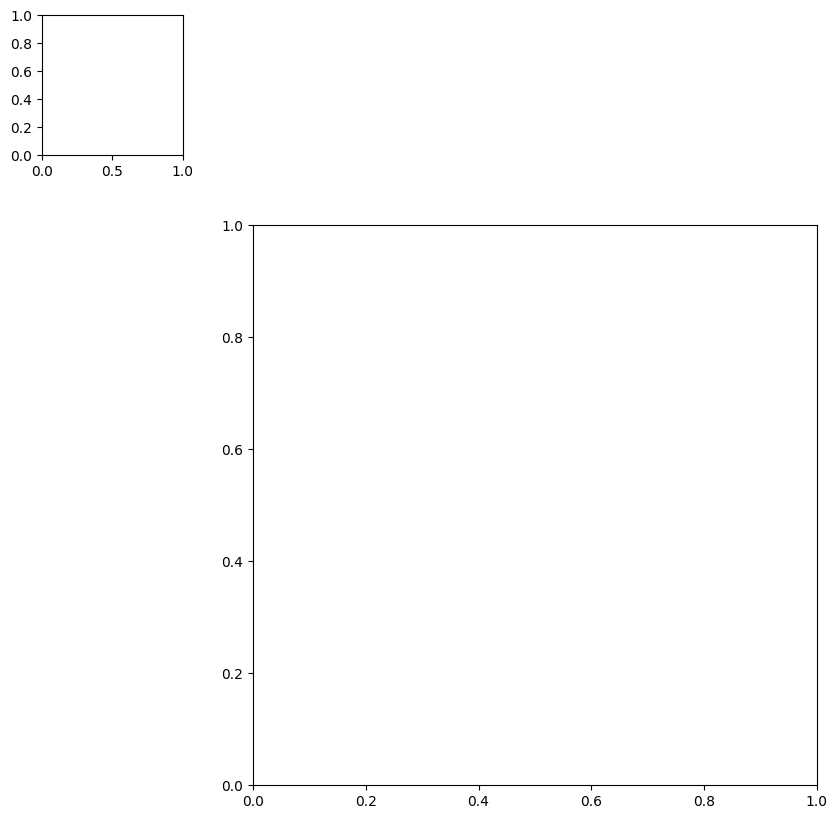

In [31]:
corrplot(df, annot=None)

In [2]:
import yaml
with open('config.yaml', 'r') as config:
    cfg = yaml.safe_load(config)
import pandas as pd
import numpy as np
from numpy.typing import NDArray
from matplotlib import pyplot as plt
import seaborn as sns
import json
from queue import LifoQueue, Queue
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from category_encoders import wrapper
from scipy import stats

In [3]:
df = pd.read_csv(cfg["dataset_maus"])[:10**5]

KeyboardInterrupt: 

In [191]:
num_colums = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [192]:

df = data_condersion(df)
df = drop_excess_parametres(df)

C:\Users\kolos\AppData\Local\Temp\ipykernel_19376\3044991090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map({True: 1.0, False: 0.0}).astype(float)
C:\Users\kolos\AppData\Local\Temp\ipykernel_19376\3044991090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map({True: 1.0, False: 0.0}).astype(float)
C:\Users\kolos\AppData\Local\Temp\ipykernel_19376\3044991090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [193]:
target_column = 'Severity'
feature_columns = list(df.columns)
feature_columns.remove(target_column)

X = df[feature_columns]
Y = df[target_column]

In [194]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [195]:
count_encoder_city = ce.CountEncoder(normalize=True)
x_train['City_Encoded'] = count_encoder_city.fit_transform(x_train['City'])
x_test['City_Encoded'] = count_encoder_city.transform(x_test['City'])

In [196]:
count_encoder_county = ce.CountEncoder(normalize=True)
x_train['County_Encoded'] = count_encoder_county.fit_transform(x_train['County'])
x_test['County_Encoded'] = count_encoder_county.transform(x_test['County'])

In [197]:
label_encoder_state = LabelEncoder()
encoded = pd.Series(label_encoder_state.fit_transform(x_train['State']))
encoded.index = x_train.index
x_train['State_Encoded'] = encoded
encoded = pd.Series(label_encoder_state.transform(x_test['State']))
encoded.index = x_test.index
x_test['State_Encoded'] = encoded

In [198]:
onehot_encoder = OneHotEncoder(sparse_output=False, min_frequency=5*10**(-4), handle_unknown="ignore")

encoded_categorical_columns_train = pd.DataFrame(onehot_encoder.fit_transform(x_train[['Timezone', 'Wind_Direction']]))
encoded_categorical_columns_test = pd.DataFrame(onehot_encoder.transform(x_test[['Timezone', 'Wind_Direction']]))

encoded_categorical_columns_train.columns = onehot_encoder.get_feature_names_out()
encoded_categorical_columns_train.index = x_train.index

encoded_categorical_columns_test.columns = onehot_encoder.get_feature_names_out()
encoded_categorical_columns_test.index = x_test.index

for column_name in onehot_encoder.get_feature_names_out():
    x_train[column_name] = encoded_categorical_columns_train[column_name]
    x_test[column_name] = encoded_categorical_columns_test[column_name]

In [199]:
weather_transformer = WeatherEncoder()

encoded_train = weather_transformer.fit_transform(x_train['Weather_Condition'])
encoded_test = weather_transformer.transform(x_test['Weather_Condition'])

for word in weather_transformer.words_:
    x_train[word] = encoded_train[word]
    x_test[word] = encoded_test[word]

In [200]:
x_train.drop(columns=['Timezone',
                      'Wind_Direction',
                      'Weather_Condition',
                      'State',
                      'County',
                      'City'
                      ], inplace=True)

x_test.drop(columns=['Timezone',
                      'Wind_Direction',
                      'Weather_Condition',
                      'State',
                      'County',
                      'City'
                      ], inplace=True)

In [201]:
feature_columns = list(x_train.columns)

In [202]:
standard_scaler = StandardScaler()
x_train.loc[:, feature_columns] = standard_scaler.fit_transform(x_train)
x_test.loc[:, feature_columns] = standard_scaler.fit_transform(x_test)

In [203]:
len(x_train), len(y_train), len(x_test), len(y_test)

(78712, 78712, 19678, 19678)

# Модели

### KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=300,
                           metric="euclidean",
                           algorithm="brute",
                           weights="uniform"
                           )

knn.fit(X=x_train, y=y_train)


KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=300)

In [32]:
y_train_pred = knn.predict(X=x_train)
y_test_pred = knn.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.6283921130196158
test=0.6235897957109462


Результаты: 0.7632 на train и 0.6248 на test
1) при algorithm="brute", weights="uniform" и при различных метриках примерно один и тот же результат на $10^5$, при $10^6$ все примерно также.<br/>
2) Ball_Tree дал примерно такой-же результат
3) KD-tree не улучшает результат
4) при n_neibhors = 300 результаты становятся примерно равными. Из чего можно сделать вывод, что при маленьком числе соседей моель переобучалась. Окончательный результата для обоих датасетов примерно 0.62
5) на $10^6$ работает около 22 минут, из чего следует, что для слишком большого датасете не применим

### Desision Tree

In [33]:
tree = DecisionTreeClassifier(max_depth=8,
                              min_samples_leaf=200,
                              criterion='gini',
                              random_state=0
                              )
tree.fit(X=x_train, y=y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=200, random_state=0)

[Text(0.5595238095238095, 0.9444444444444444, 'x[6] <= 0.008\ngini = 0.496\nsamples = 78712\nvalue = [73, 43259, 35354, 26]'),
 Text(0.40476190476190477, 0.8333333333333334, 'x[6] <= -0.112\ngini = 0.085\nsamples = 44397\nvalue = [71, 42425, 1875, 26]'),
 Text(0.35714285714285715, 0.7222222222222222, 'x[38] <= -0.562\ngini = 0.512\nsamples = 4451\nvalue = [71, 2479, 1875, 26]'),
 Text(0.23809523809523808, 0.6111111111111112, 'x[21] <= 0.284\ngini = 0.41\nsamples = 1183\nvalue = [16, 854, 309, 4]'),
 Text(0.14285714285714285, 0.5, 'x[20] <= 0.796\ngini = 0.282\nsamples = 680\nvalue = [9, 567, 101, 3]'),
 Text(0.09523809523809523, 0.3888888888888889, 'x[38] <= -0.576\ngini = 0.12\nsamples = 408\nvalue = [1, 382, 24, 1]'),
 Text(0.047619047619047616, 0.2777777777777778, 'gini = 0.217\nsamples = 203\nvalue = [0, 178, 24, 1]'),
 Text(0.14285714285714285, 0.2777777777777778, 'gini = 0.01\nsamples = 205\nvalue = [1, 204, 0, 0]'),
 Text(0.19047619047619047, 0.3888888888888889, 'gini = 0.456\ns

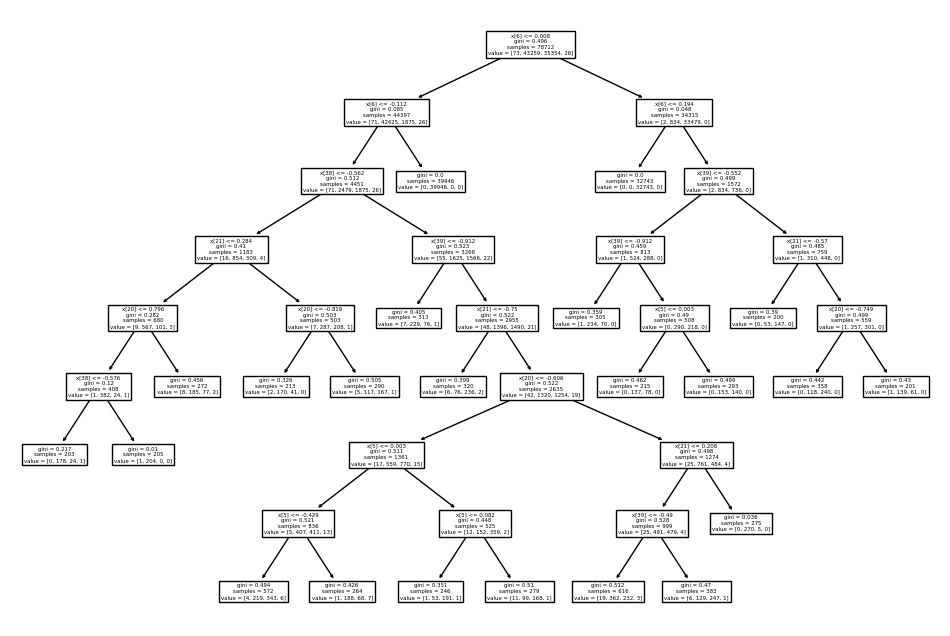

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plot_tree(tree, ax=ax)

In [35]:
y_train_pred = tree.predict(X=x_train)
y_test_pred = tree.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.9766871633296067
test=0.9750990954365281


Результаты: 
1) Desision tree дает достаточно хорошее пресказание, примерно 0.8 на датасете из $10^6$ элементов. Однако совершенно не угадывает Severity=4
2) Если поэкспериментировать с количеством листов и максимальной глубиной, то можно улучшить результат. Но все равно Severity=4 не угадывается.
3) Изменение с gini на entropy также не изменяет ситуацию
4) при увеличении датасета, начинает угадывать 4, однако перестает 1
5) при max_depth=10, min_samples_leaf=500, criterion='gini' начал угадывать все 4 позиции, при этом доля правильно угаданных приблизительно 0.9

### Random Forest

In [36]:
random_forest = RandomForestClassifier(n_estimators=10,
                                       max_depth=5,
                                       min_samples_leaf=30,
                                       criterion="gini",
                                       random_state=0,
                                       )
random_forest.fit(X=x_train, y=y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=30, n_estimators=10,
                       random_state=0)

In [37]:
y_train_pred = random_forest.predict(X=x_train)
y_test_pred = random_forest.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.9651641426974286
test=0.9687976420367923


Результаты: <br/>
Desision Tree работает лучше, связано это, скорее всего, с тем, что сильно много 2 и 3. Random Forest берет определенные части, при этом еще и пытается использовать различные признаки. В этих частях 2 и 3 слишком много и все сваливается в них.

### Bagging

In [38]:
bagging = BaggingClassifier(n_estimators=10,
                            max_samples=0.8,
                            max_features=0.9,
                            random_state=0,
                            estimator=DecisionTreeClassifier(max_depth=8,
                                                             min_samples_leaf=200,
                                                             criterion='gini',
                                                             random_state=0
                                                             )
                            )
bagging.fit(X=x_train, y=y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=8,
                                                   min_samples_leaf=200,
                                                   random_state=0),
                  max_features=0.9, max_samples=0.8, random_state=0)

In [39]:
y_train_pred = bagging.predict(X=x_train)
y_test_pred = bagging.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.9766871633296067
test=0.9763187315784124


Результаты:
1) При использовании Bagging с DesisionTreeClassifier и с n_estimators=3, max_samples=0.8, max_features=0.9 результат демонстрируется очень хороший. На $10^5$ около 0.97. При этом угадывает все типы Severity
2) При более большом датасете модель достаточно сильно переобучается. Изменение параметров особо не помогают изменить ситуацию
3) при использовании estimator=DessisionTreeClassifier на всем датасете переобучения не возникает, при этом доля угаданных 0.89. Однако, стоит заметить что 1 и 4 угадывается не очень хорошо

### SVM

In [40]:
svm = SVC(kernel="sigmoid",
          max_iter=8000,
          random_state=0
          )
svm.fit(X=x_train, y=y_train)

c:\Users\kolos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=8000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='sigmoid', max_iter=8000, random_state=0)

In [41]:
y_train_pred = svm.predict(X=x_train)
y_test_pred = svm.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.5725175322695396
test=0.5743978046549446


Результаты:
1) SVM с линейным ядром не эффективен. Угадывание: 0.54
2) SVM с полиномиальным ядром не эффективен. Угадывание: 0.44. Изменение степени полинома не помогает улучшить ситуацию
3) SVM c радиально базовой функцией не эффективен. Угадывание: 0.47
4) SVM c сигмоидой не эффективен. Угадывание: 0.57

### Logistic Regression

In [173]:
logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_regression.fit(X=x_train, y=y_train)

c:\Users\kolos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [174]:
y_train_pred = logistic_regression.predict(X=x_train)
y_test_pred = logistic_regression.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.7907031493025745
test=0.7905310435720913


In [204]:
class BinLogisticClassifier(BaseEstimator):
    def __init__(self, classes: list | None = None) -> None:
        super().__init__()
        self.classes_ = classes
        self._Regressors = [
            LogisticRegression(multi_class="auto", solver="lbfgs"), # x_1, x_2 | x_3, x_4
            LogisticRegression(multi_class="auto", solver="lbfgs"), # x_1 | x_2
            LogisticRegression(multi_class="auto", solver="lbfgs") # x_3 | x_4
        ]
        
    def fit(self, X: NDArray, y: NDArray) -> None:
        train_classes = set(y)
        if self.classes_ == None:
            self.classes_ = list(train_classes)
        elif not self.classes_ == train_classes:
            ValueError("Not all classes were passed during initialization") 
        
        first_cls, second_cls = self.classes_[:2], self.classes_[2:]
        
        y_train_bin = [
            0 if cls in first_cls else 1
            for cls in y 
            ]
        
        self._Regressors[0].fit(X=X, y=y_train_bin)
        
        mask = y.isin(first_cls)
        
        first_X = X.loc[mask]
        second_X = X.loc[~mask]
        
        first_y_train_bin = pd.Series([
            0 if cls == first_cls[0] else 1
            for cls in y.loc[mask]
        ])
        second_y_train_bin = pd.Series([
            0 if cls == second_cls[0] else 1
            for cls in y.loc[~mask]
        ])
        
        self._fit(X=first_X, y=first_y_train_bin, bin_cls=0)
        self._fit(X=second_X, y=second_y_train_bin, bin_cls=1)
        
    def _fit(self, X: pd.DataFrame, y: pd.Series, bin_cls: int) -> None:
        self._Regressors[1 + bin_cls].fit(X=X, y=y)
        
    def predict(self, X: NDArray) -> NDArray:
        y_bin = self._Regressors[0].predict(X=X)
        mask = y_bin == 0
        
        first_X = X.loc[mask]
        second_X = X.loc[~mask]
                
        y_bins = [None, None]
        y_bins[0] = self._predict(first_X, 0)
        y_bins[1] = self._predict(second_X, 1)
        
        k = [-1, -1]
        encoded_classes = list()
        
        for cls in y_bin:
            k[cls] += 1
            encoded_classes.append((cls, y_bins[cls][k[cls]]))
            
        return np.array([
            self._decode(cls) for cls in encoded_classes
        ])
            
    def _predict(self, X: pd.DataFrame, bin_cls: int) -> NDArray:
        return self._Regressors[1 + bin_cls].predict(X=X)
    
    def _decode(self, code: tuple):
        code_book = {
            (0, 0): self.classes_[0],
            (0, 1): self.classes_[1],
            (1, 0): self.classes_[2],
            (1, 1): self.classes_[3]
        }
        return code_book[code]
    

In [205]:
bin_logistic_regression = BinLogisticClassifier([1, 4, 2, 3])
bin_logistic_regression.fit(X=x_train, y=y_train)

In [206]:
y_train_pred = bin_logistic_regression.predict(X=x_train)
y_test_pred = bin_logistic_regression.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

ValueError: Found array with 0 sample(s) (shape=(0, 73)) while a minimum of 1 is required by LogisticRegression.

In [332]:
class LogisticRegressionReductingClassifier(BaseEstimator):
    def __init__(self, classes: list | None = None) -> None:
        super().__init__()
        self.classes_ = classes
        self._Regressors = [
            LogisticRegression(multi_class="auto", solver="lbfgs"), # x_1, x_2, x_3 | x_4
            LogisticRegression(multi_class="auto", solver="lbfgs"), # x_1,  x_2 | x_3
            LogisticRegression(multi_class="auto", solver="lbfgs") # x_1 | x_2
        ]
        
    def fit(self, X: NDArray, y: NDArray) -> None:
        train_classes = set(y)
        if self.classes_ == None:
            self.classes_ = list(train_classes)
        elif not self.classes_ == train_classes:
            ValueError("Not all classes were passed during initialization") 
            
        for i in range(len(self._Regressors)):
            classes = self.classes_[:len(self._Regressors) + 1 - i]
            mask = y.isin(classes)
            self._fit(X=X[mask], y=y[mask], n_regressor=i, classes=classes)
        
    def _fit(self, X: pd.DataFrame, y: pd.Series, n_regressor: int, classes: list) -> None:
        first_cls, second_cls = classes[:-1], classes[-1]
        
        y_train_bin = [
            0 if cls in first_cls else 1
            for cls in y 
            ]
        
        self._Regressors[n_regressor].fit(X=X, y=y_train_bin)
        
    def predict(self, X: pd.DataFrame) -> NDArray:
        
        y_predict = np.zeros(len(X), dtype=int)
        
        for i in range(len(self._Regressors)):
            y_bin = self._predict(X=X, n_regressor=i)
            mask = y_bin == 0
            X = X.loc[mask]
            k = 0
            for idx, y in enumerate(y_predict):
                if y == 0:
                    if y_bin[k] == 1:
                        y_predict[idx] = self.classes_[-(i + 1)]
                    k += 1
                    
            if len(X) == 0: 
                return y_predict
            
        return y_predict
            
            
    def _predict(self, X: pd.DataFrame, n_regressor: int) -> NDArray:
        return self._Regressors[n_regressor].predict(X=X)
    

In [329]:
logistic_regression_reducting = LogisticRegressionReductingClassifier([1, 4, 3, 2])
logistic_regression_reducting.fit(X=x_train, y=y_train)

In [330]:
y_train_pred = logistic_regression_reducting.predict(X=x_train)
y_test_pred = logistic_regression_reducting.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

0
0
train=0.6371709523325542
test=0.6441711556052444


Результаты:
1) На большом датасете логисчтическая регрессия дает достатточно хороший результат, около 0.8
2) если брать достаточно большой датасет, то проблема в том, что при первой регрессии склоняется ну тада, из-за чего начинаются проблемы и редко угадывает 1 и 4

### Naive Bassian Classifier

In [44]:
bassian = GaussianNB()
bassian.fit(X=x_train, y=y_train)

GaussianNB()

In [45]:
y_train_pred = bassian.predict(X=x_train)
y_test_pred = bassian.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.04845512755361317
test=0.552393535928448


Результаты: <br/>
Все плохо, так как данные не сбалансированы. + не стоит забывать о том, что предполагается, что данные не коррелируют. У нас немного не так

### Linear Discriminant Analysis

In [53]:
discriminant_analyse = LinearDiscriminantAnalysis(solver='lsqr')
discriminant_analyse.fit(X=x_train, y=y_train)

LinearDiscriminantAnalysis(solver='lsqr')

In [54]:
y_train_pred = discriminant_analyse.predict(X=x_train)
y_test_pred = discriminant_analyse.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.6319239760138226
test=0.6391401565199716


Результаты: <br/>


In [331]:
count_predicted_Severity = dict.fromkeys([1, 2, 3, 4], 0)
count_real_Severity = dict.fromkeys([1, 2, 3, 4], 0)

for p, r in zip(y_train_pred, y_train):
    count_real_Severity[r] += 1
    count_predicted_Severity[p] += 1
    
count_real_Severity, count_predicted_Severity

({1: 73, 2: 43259, 3: 35354, 4: 26}, {1: 0, 2: 45437, 3: 33275, 4: 0})